<table class="table table-bordered">
    <tr>
        <th style="width:250px"><img src='https://staffhome.np.edu.sg/campus/corpcomm/Downloadable/Logo%20%20Icon/ICT/ICT%20Logo%20Full%20Colour.jpg' style="width: 100%; height: 125px; "></th>
        <th style="text-align:center;"><h1>Data Wrangling</h1><h2>Assignment 1 </h2><h3>Diploma in Data Science</h3></th>
    </tr>
</table>

In [1]:
# import the pacakges
import numpy as np
import pandas as pd
import seaborn as sns

### Step 1: Load Data into Jupyter Notebook

In [2]:
#Load the data into a Pandas dataframe.
file = './song_popularity.csv'
song_data = pd.read_csv(file)

In [3]:
song_data.head(10)

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,high,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Med,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,Hi,-5.065,Blare,46.68,114.90
5,EI7,Bring Me To Life,235893,0.008771,0.31284,94.5,0.000002,4,194.8816,0,NaN,189.931,0.320,Extra,-3.169,?,63.98,141.75
6,HI7,Last Resort,199893,0.000494,0.57519,88.7,0.001110,4,160.7824,0,93.60,90.578,0.724,High,-3.659,Boom,67.74,133.05
7,EI7,Are You Gonna Be My Girl,213800,0.001450,0.60687,95.3,0.000582,2,?,1,NaN,105.046,0.537,Extra,-3.435,Boom,62.55,142.95
8,EI7,Mr. Brightside,222586,0.001058,0.32670,93.6,0.000000,1,119.377476,1,NaN,148.112,0.234,NaN,-3.660,Boom,61.11,140.40
9,EI9,Sex on Fire,203346,0.001686,0.53658,90.5,0.010400,9,129.0496,1,81.00,153.398,0.374,Extra,-5.653,Blare,54.76,135.75


In [4]:
song_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

In [5]:
song_data_2 = song_data.copy()

### Step 2: Exploratory Data Analysis

Text(0.5, 1.0, 'Cardinality')

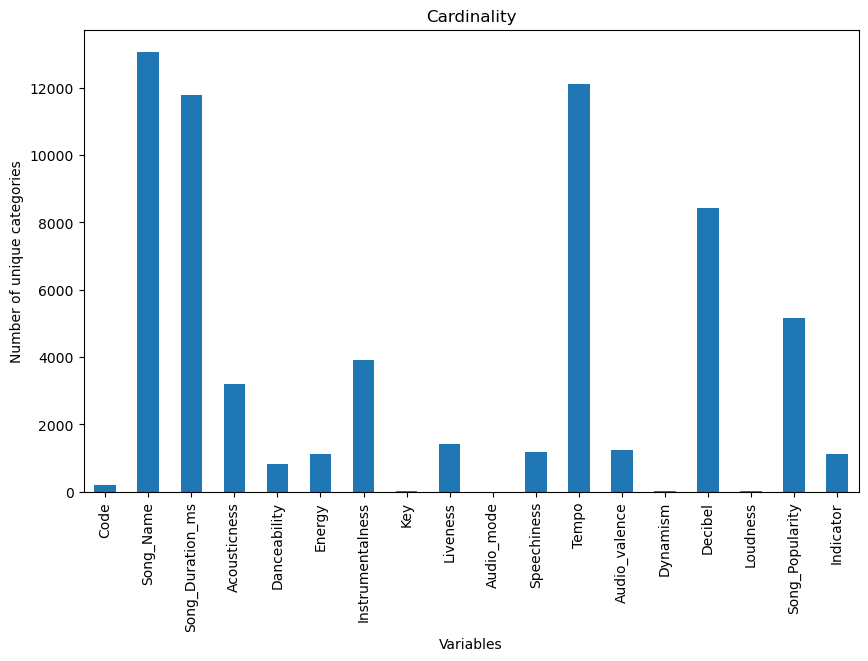

In [6]:
#Check cardinality of the variables
import matplotlib.pyplot as plt
song_data.nunique().plot.bar(figsize=(10,6))

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

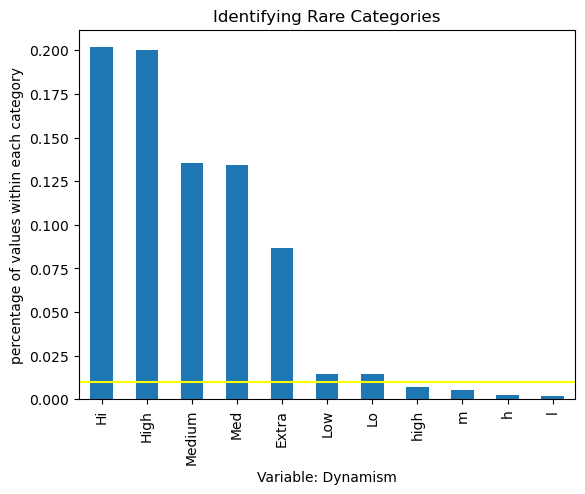

In [7]:
#find rare variables
fig = (song_data['Dynamism'].value_counts() / len(song_data) ).sort_values(ascending=False).plot.bar()

fig.axhline(y=0.01, color='yellow')

fig.set_ylabel('percentage of values within each category')
fig.set_xlabel('Variable: Dynamism')
fig.set_title('Identifying Rare Categories')
plt.show()

Text(0.5, 0, 'Variables')

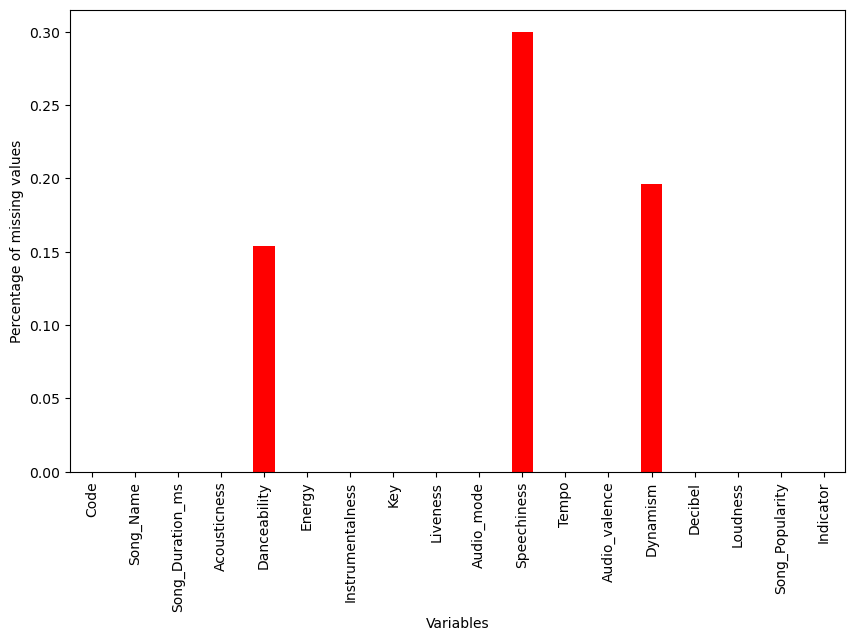

In [8]:
#Show percentage of missing variables
song_data.isnull().mean().plot.bar(figsize=(10,6), color = 'r')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')

In [9]:
song_data_2.isnull().mean()

Code                0.000000
Song_Name           0.000000
Song_Duration_ms    0.000000
Acousticness        0.000000
Danceability        0.153809
Energy              0.000000
Instrumentalness    0.000000
Key                 0.000000
Liveness            0.000000
Audio_mode          0.000000
Speechiness         0.300027
Tempo               0.000000
Audio_valence       0.000000
Dynamism            0.196337
Decibel             0.000000
Loudness            0.000000
Song_Popularity     0.000000
Indicator           0.000000
dtype: float64

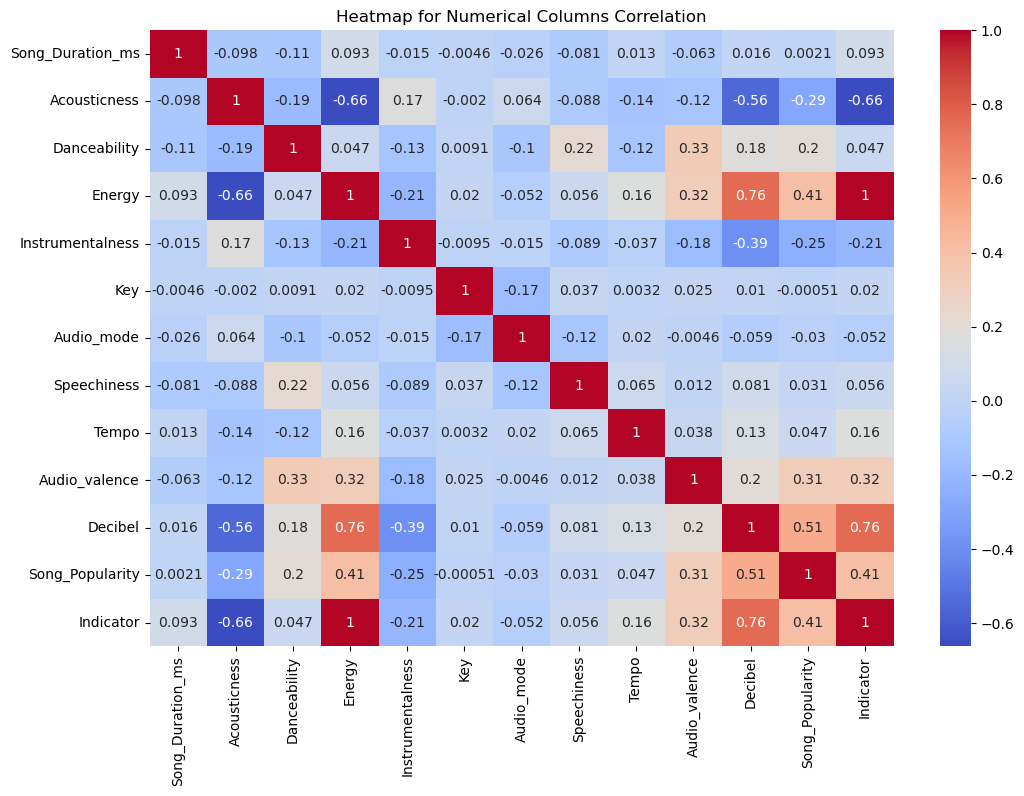

In [10]:
num_cols = [c for c in song_data.columns if song_data[c].dtypes !='O']

# Calculate correlation matrix
corr_matrix = song_data[num_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Numerical Columns Correlation')
plt.show()

### Step 3: Data Preprocessing

In [11]:
#for convenience, convert all column names to lower case.
song_data_names = []
for column in song_data:
    song_data_names.append(column.lower())

song_data.columns = song_data_names

In [12]:
song_data = song_data.drop(columns=['code', 'song_name'])

In [13]:
song_data = song_data.replace({"?" : np.nan})

song_data = song_data.astype({'liveness' : 'float64'})

In [14]:
#Let us check the unique variables of the Dynamism column once again. 
song_data["dynamism"].value_counts()

dynamism
Hi        3800
High      3766
Medium    2553
Med       2529
Extra     1635
Low        274
Lo         272
high       127
m           99
h           50
l           32
Name: count, dtype: int64

In [15]:
#As seen above, there are many repeated and different variables for the same thing (e.g high and hi), we will remap the variables.
dynamism_dictionary = {'dynamism' : {'Hi' : 'High', 'Med' : 'Medium', 'high' : 'High', 'Lo' : 'Low', 'h' : 'High', 'm' : 'Medium', 'Lo' : 'Low', 'l' : 'Low'}}
song_data = song_data.replace(dynamism_dictionary)

In [16]:
song_data["dynamism"].value_counts()

dynamism
High      7743
Medium    5181
Extra     1635
Low        578
Name: count, dtype: int64

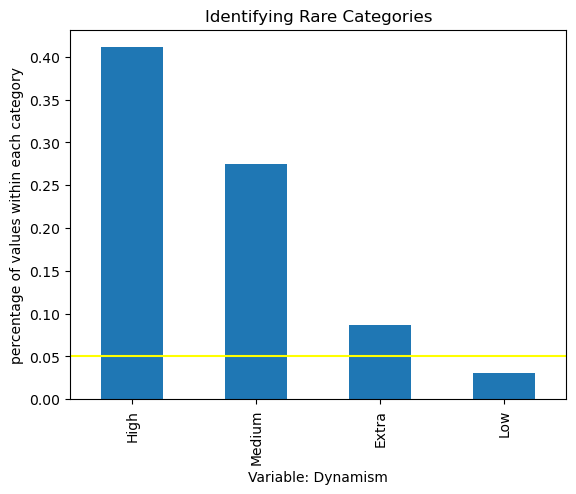

In [17]:
#
fig = (song_data['dynamism'].value_counts() / len(song_data) ).sort_values(ascending=False).plot.bar()

fig.axhline(y=0.05, color='yellow')

fig.set_ylabel('percentage of values within each category')
fig.set_xlabel('Variable: Dynamism')
fig.set_title('Identifying Rare Categories')
plt.show()

In [18]:
#check distribution of numerical variables and outliers in numerical variables
num_cols = [c for c in song_data.columns if song_data[c].dtypes !='O']
song_data[num_cols].isnull().mean().sort_values()

song_duration_ms    0.000000
acousticness        0.000000
energy              0.000000
instrumentalness    0.000000
key                 0.000000
audio_mode          0.000000
tempo               0.000000
audio_valence       0.000000
decibel             0.000000
song_popularity     0.000000
indicator           0.000000
liveness            0.000053
danceability        0.153809
speechiness         0.300027
dtype: float64

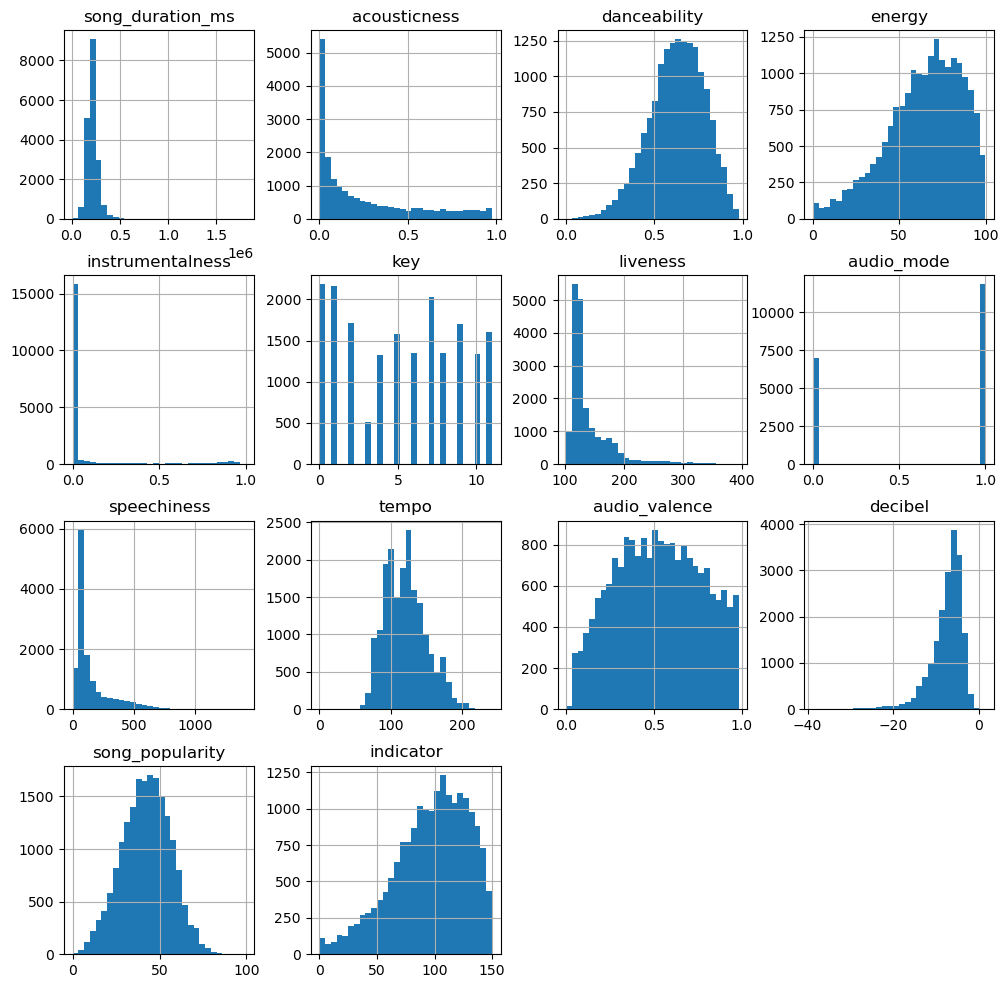

In [19]:
song_data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

In [20]:
import scipy.stats as stats
import seaborn as sns
def diagnostic_plots(df, variable):
        
    plt.figure(figsize=(18,8))
    plt.subplot(1, 3, 1)
    sns.histplot(df[variable], bins=30, kde=True)
    plt.title('Histogram')

    plt.subplot(1, 3, 2)
    stats.probplot(df[variable], dist="norm", plot=plt)

    plt.subplot(1, 3, 3)
    sns.boxplot(y=df[variable])
    plt.title('Boxplot')

    plt.suptitle(variable, fontsize=20)
    plt.show()

In [21]:
song_data[num_cols].isnull().mean().sort_values(ascending = True)

song_duration_ms    0.000000
acousticness        0.000000
energy              0.000000
instrumentalness    0.000000
key                 0.000000
audio_mode          0.000000
tempo               0.000000
audio_valence       0.000000
decibel             0.000000
song_popularity     0.000000
indicator           0.000000
liveness            0.000053
danceability        0.153809
speechiness         0.300027
dtype: float64

In [22]:
#before winsorisation, we must handle missing values. we will use mean imputation for this task.
from feature_engine.imputation import MeanMedianImputer

mean_imputer = MeanMedianImputer(imputation_method='mean',
                                   variables=['danceability', 'speechiness', 'liveness'])

mean_imputer.fit(song_data)

MeanMedianImputer(imputation_method='mean',
                  variables=['danceability', 'speechiness', 'liveness'])

In [23]:
song_data = mean_imputer.transform(song_data)

In [24]:
song_data[num_cols].isnull().mean()

song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
audio_valence       0.0
decibel             0.0
song_popularity     0.0
indicator           0.0
dtype: float64

In [25]:
from feature_engine.outliers import Winsorizer

windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=list(song_data[num_cols].columns))

windsorizer.fit(song_data[num_cols])
song_data[num_cols] = windsorizer.transform(song_data[num_cols])

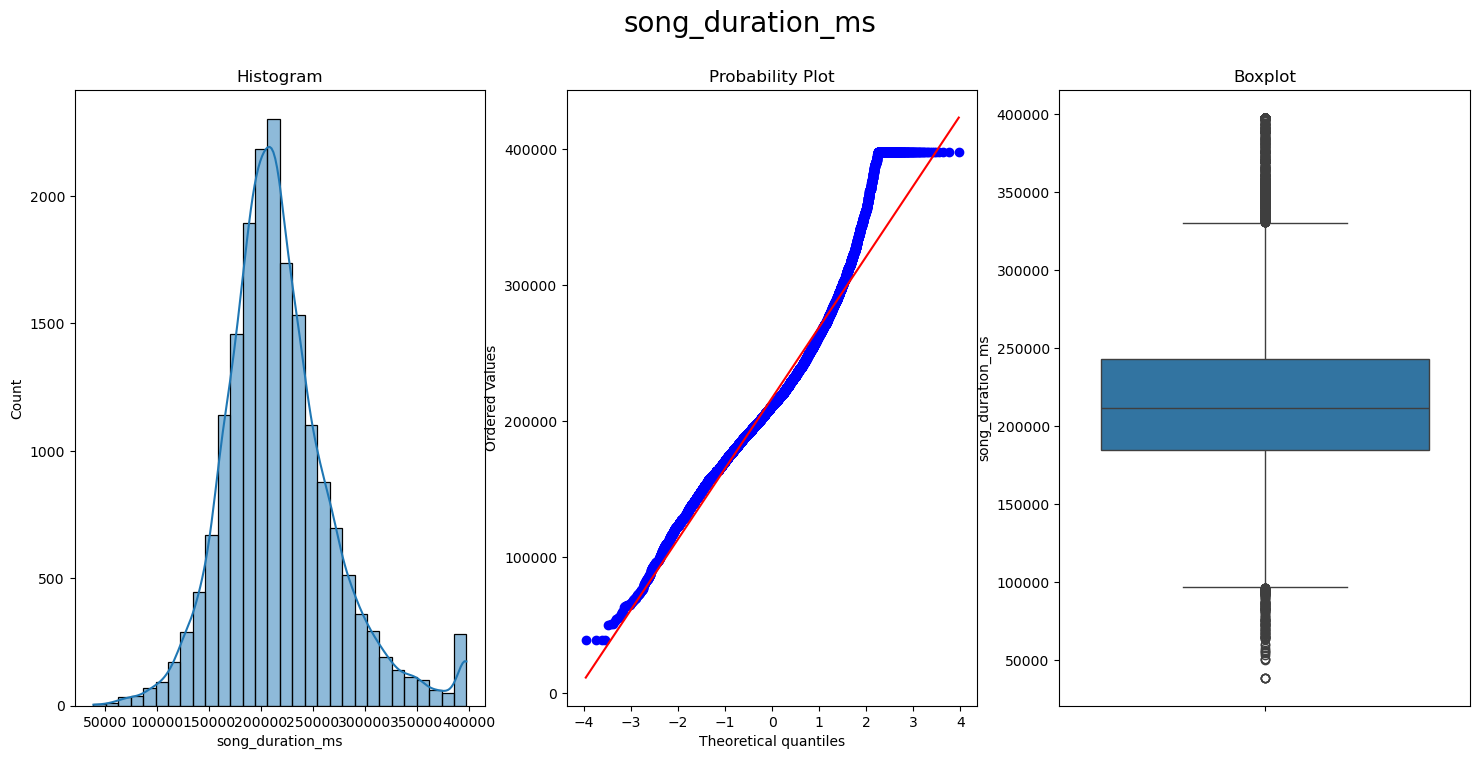

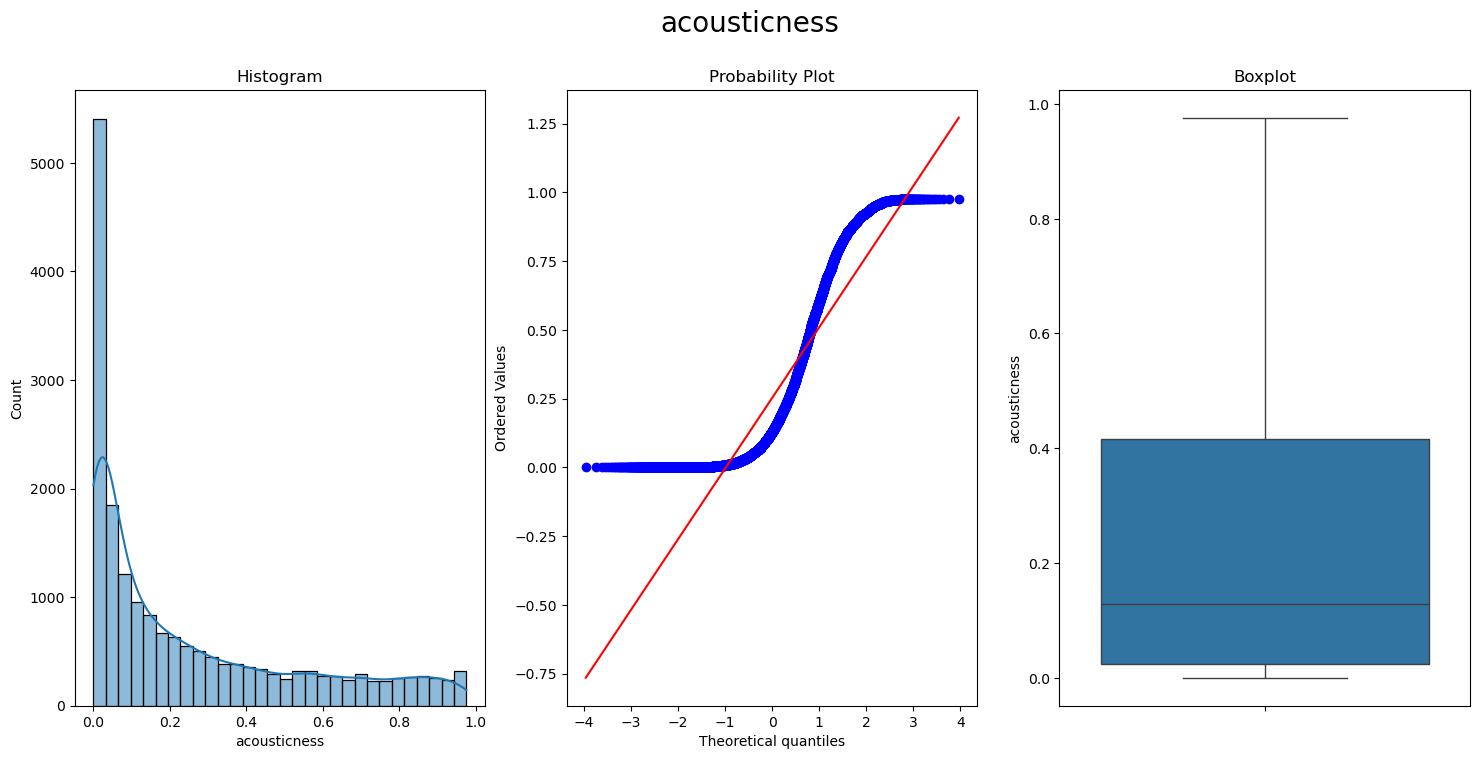

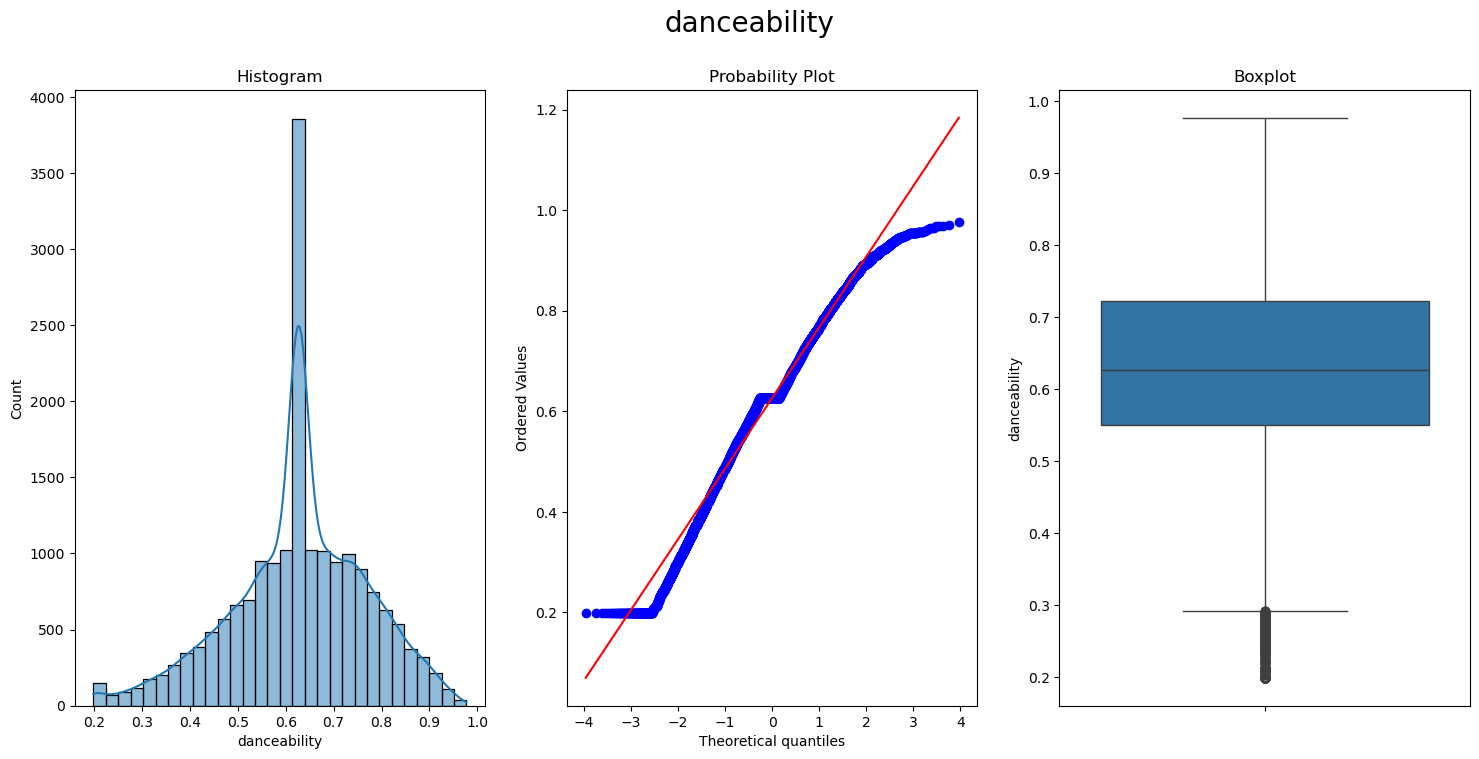

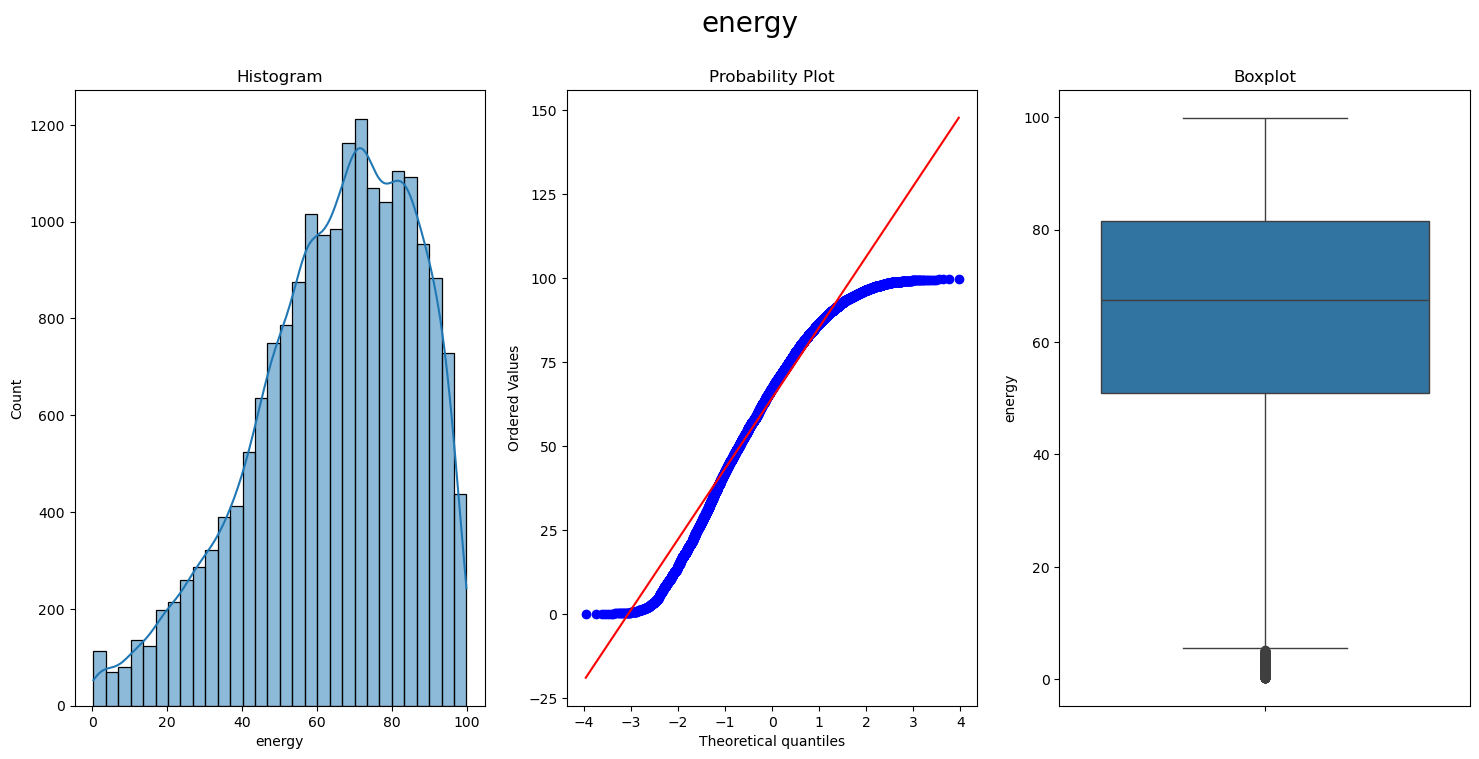

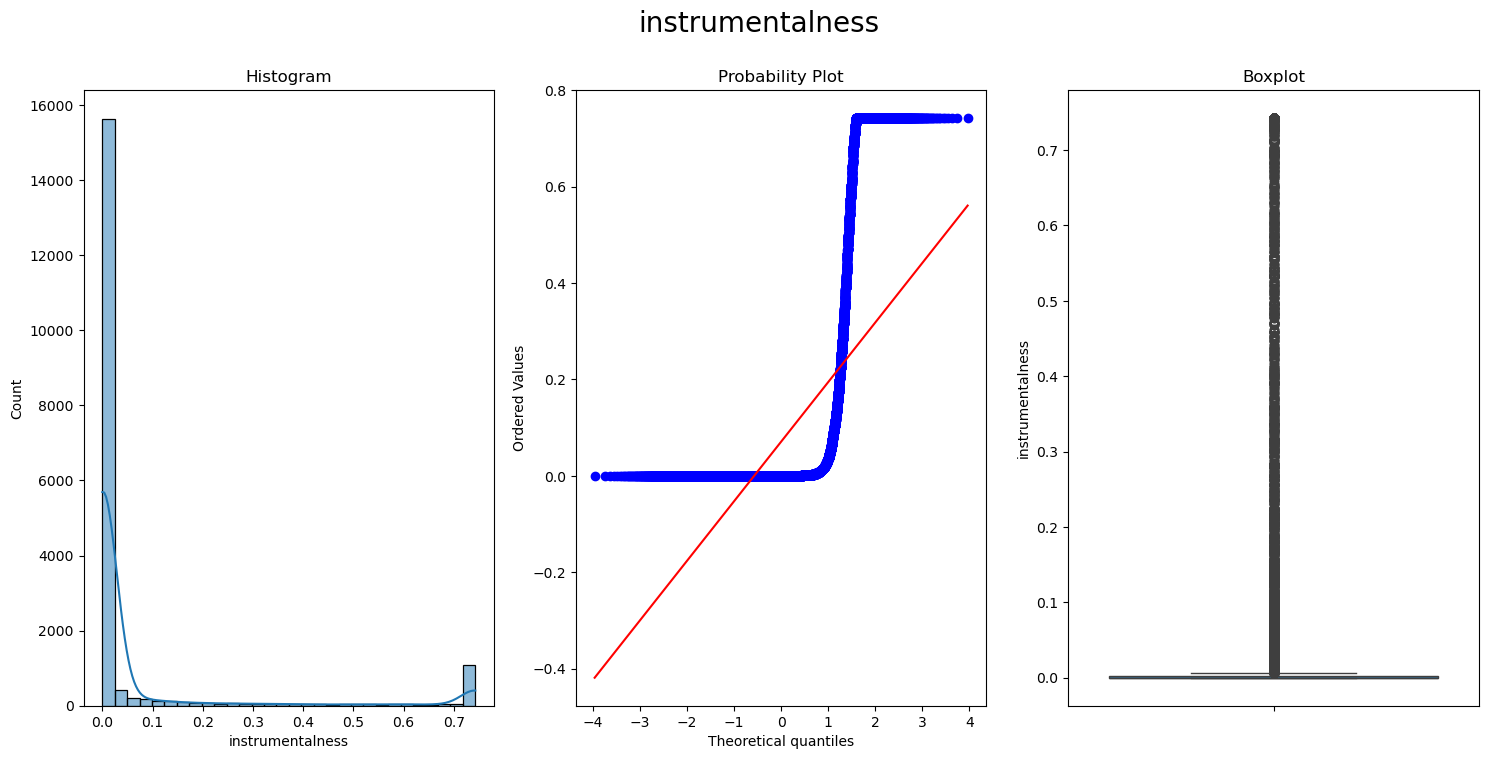

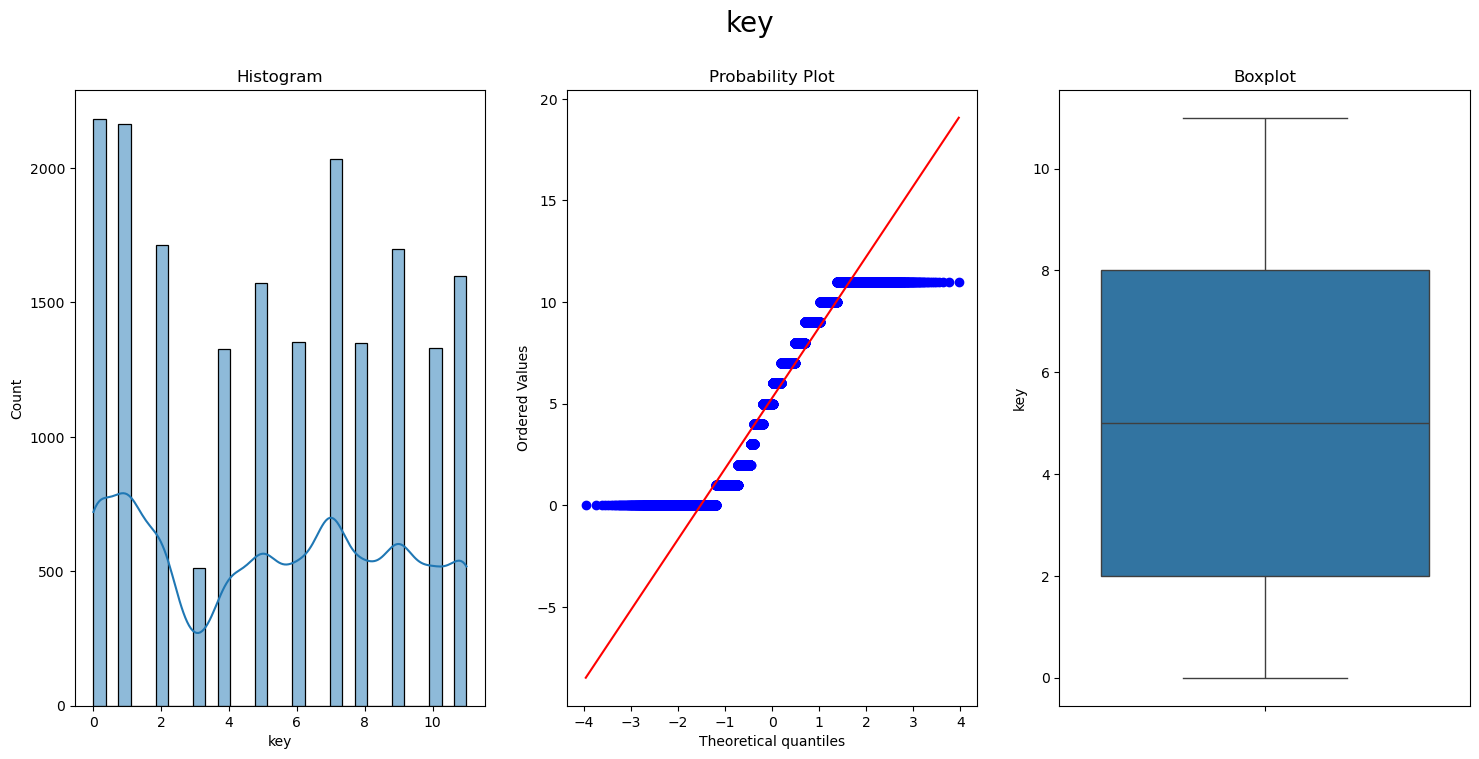

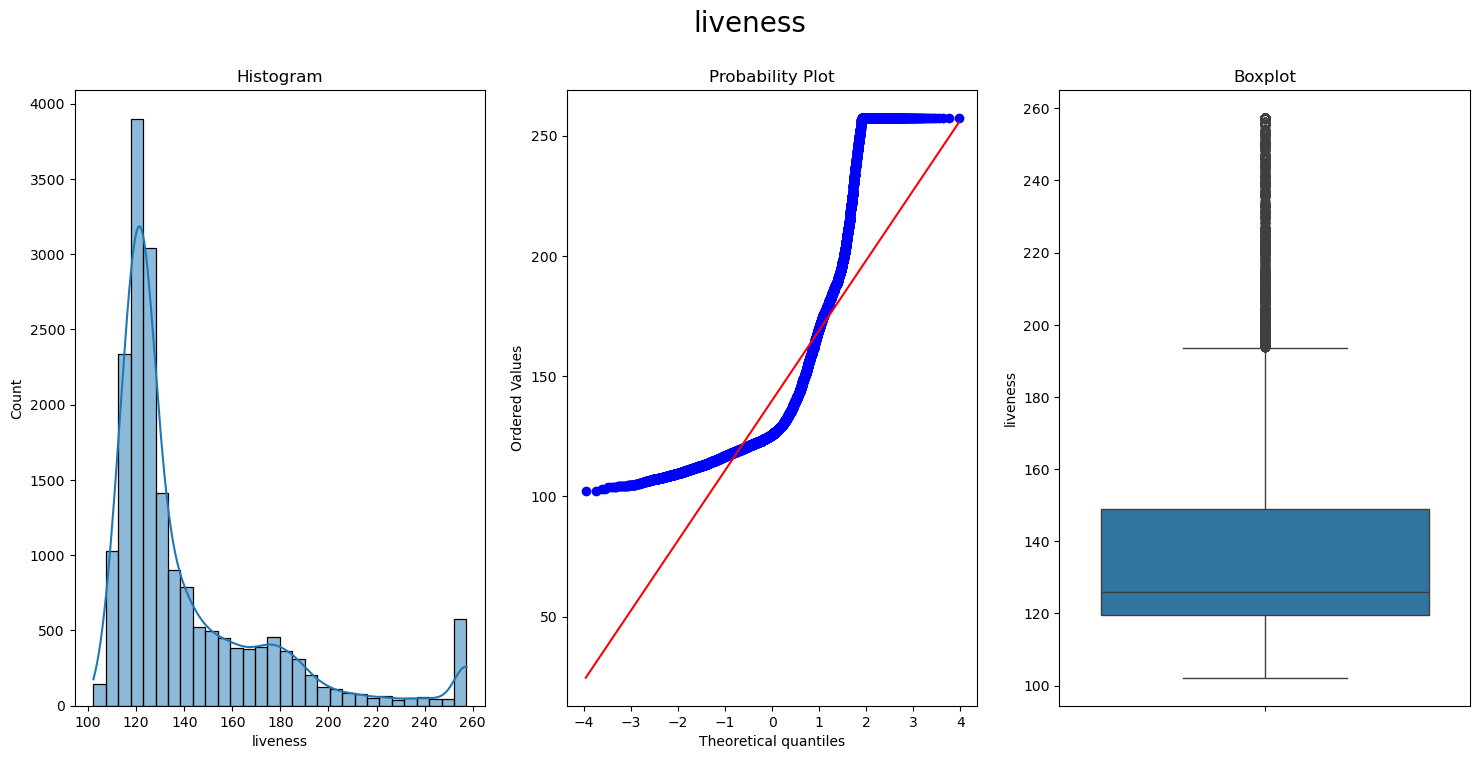

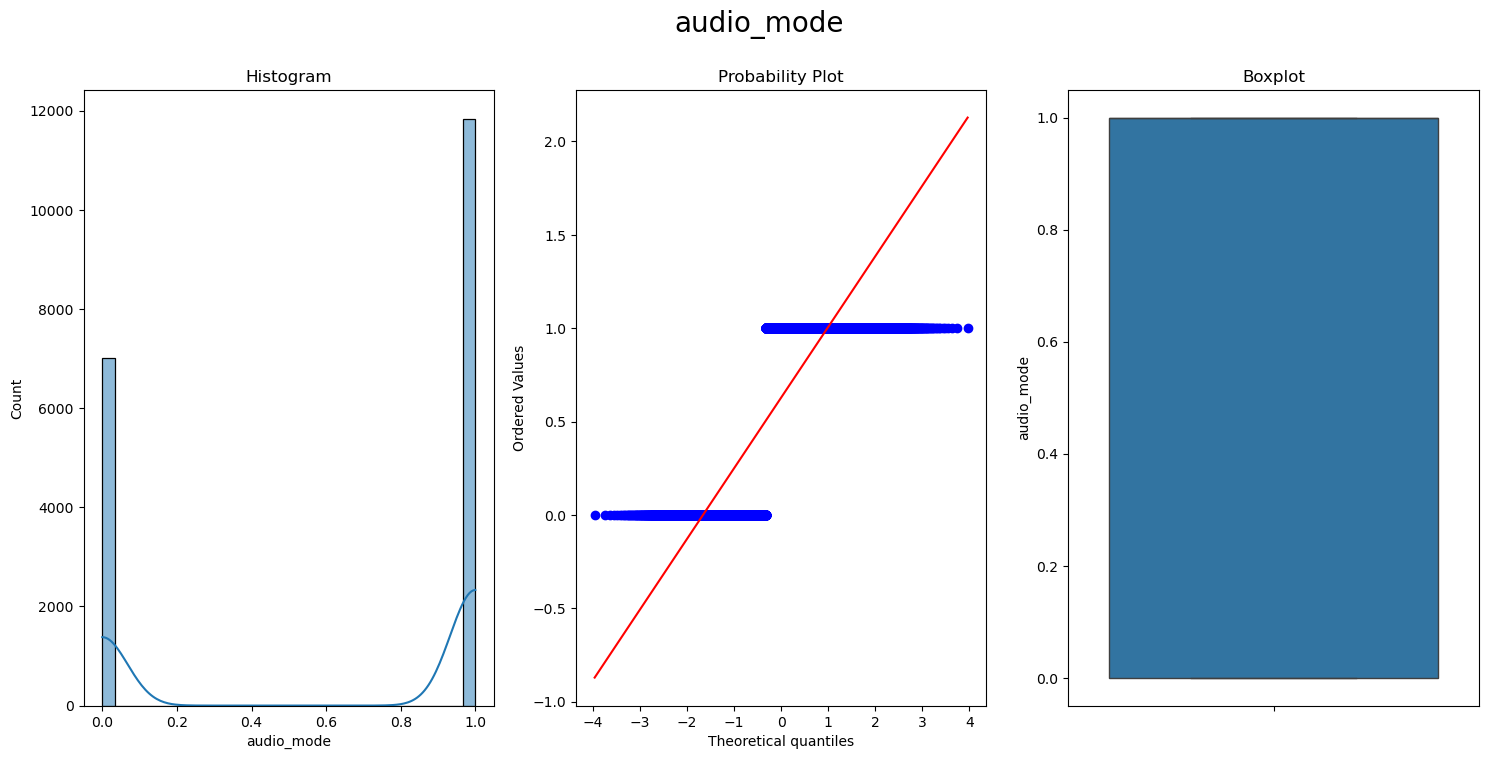

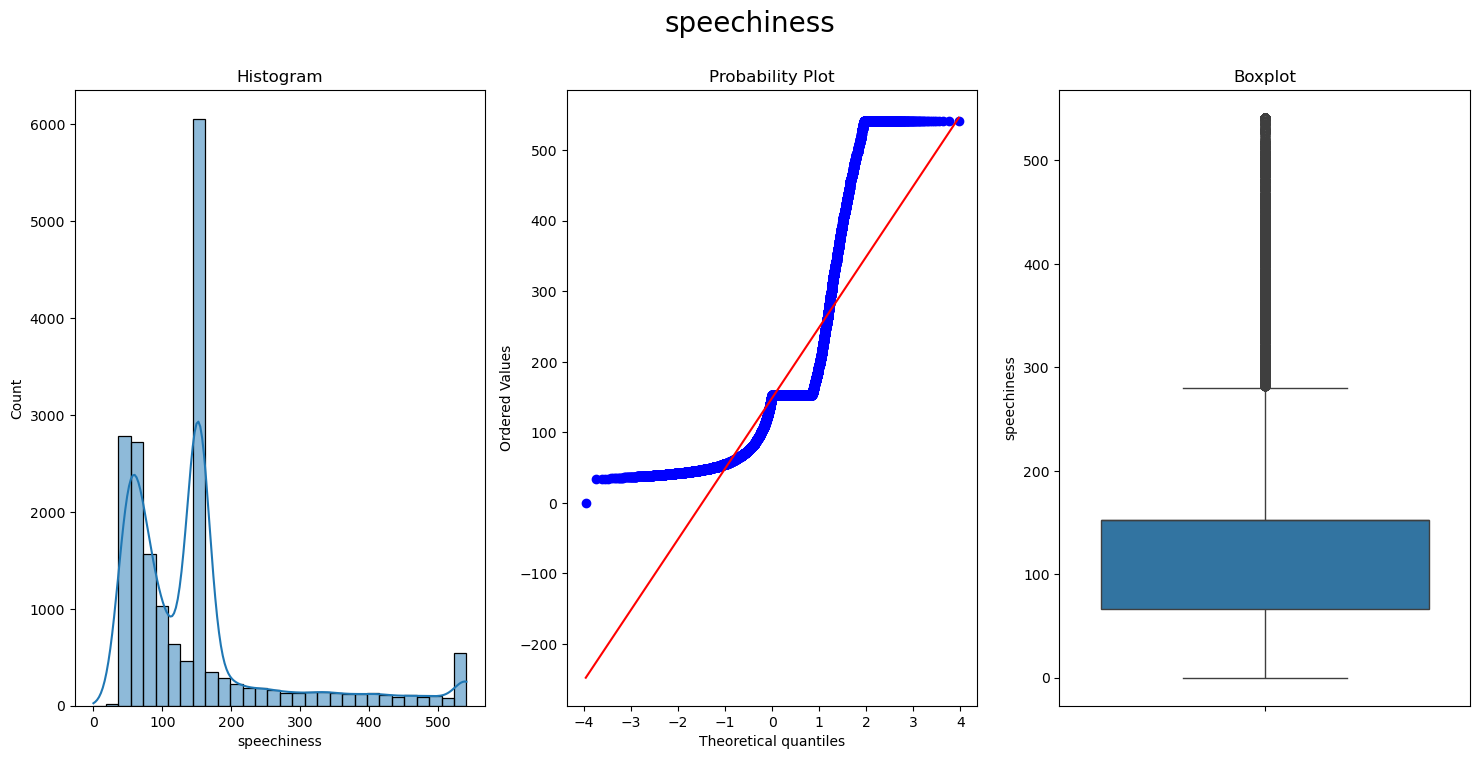

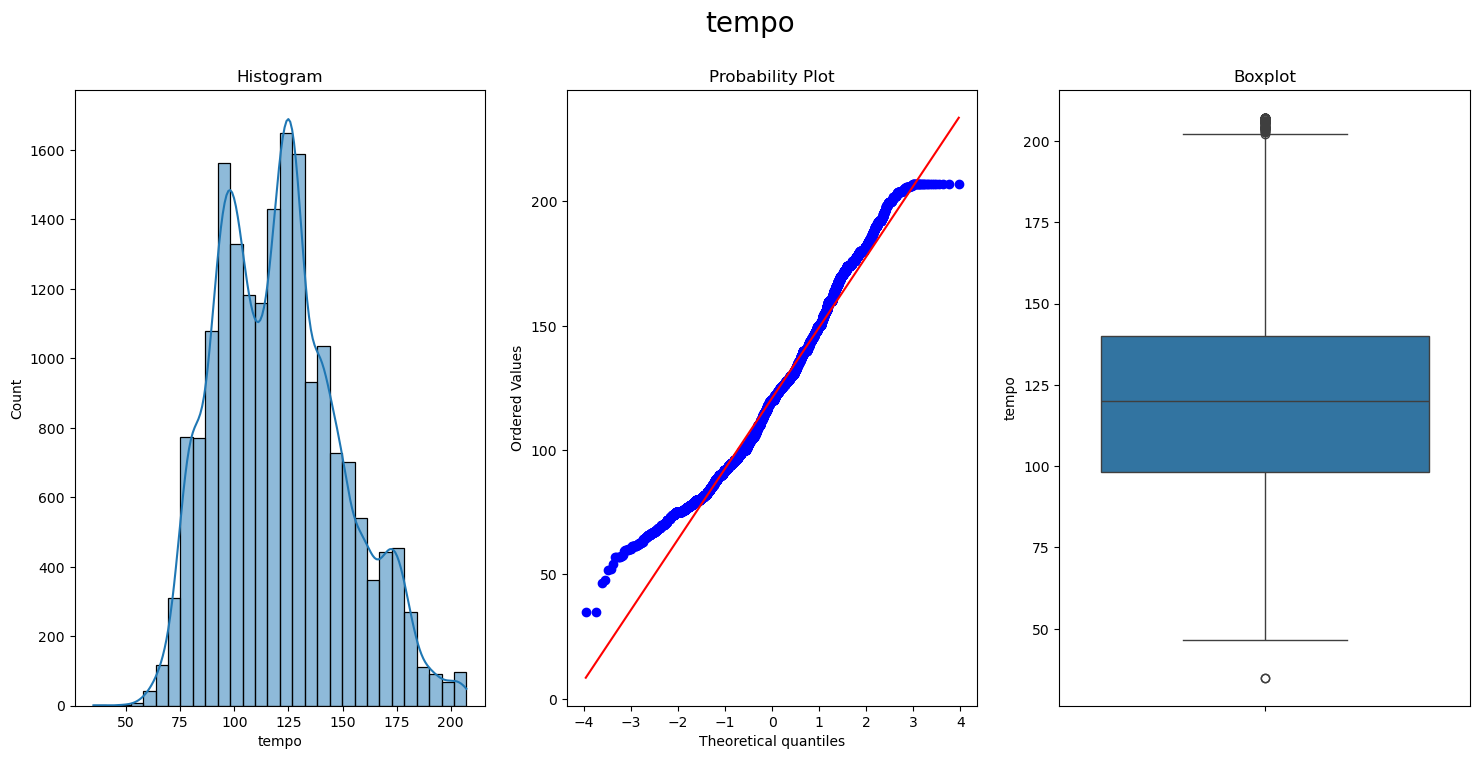

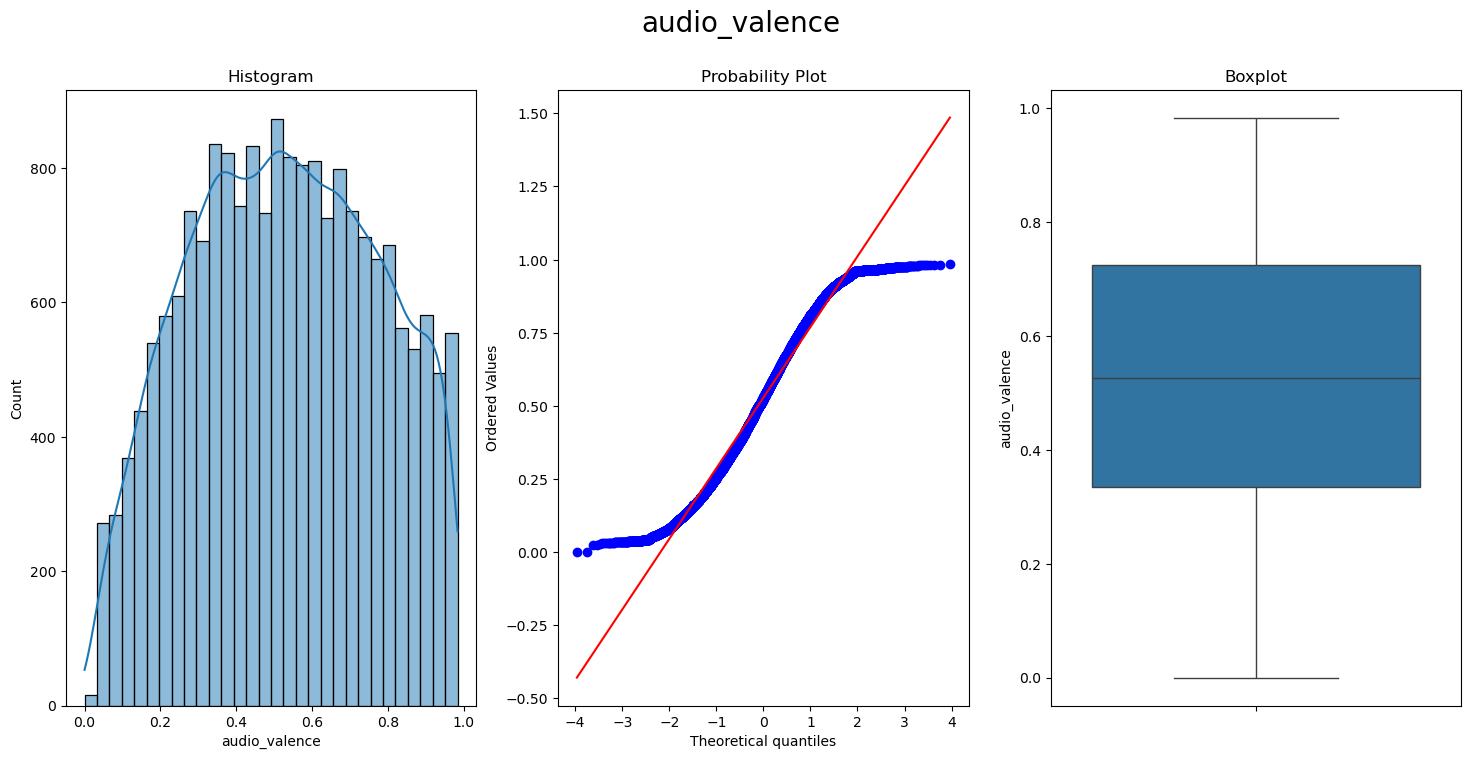

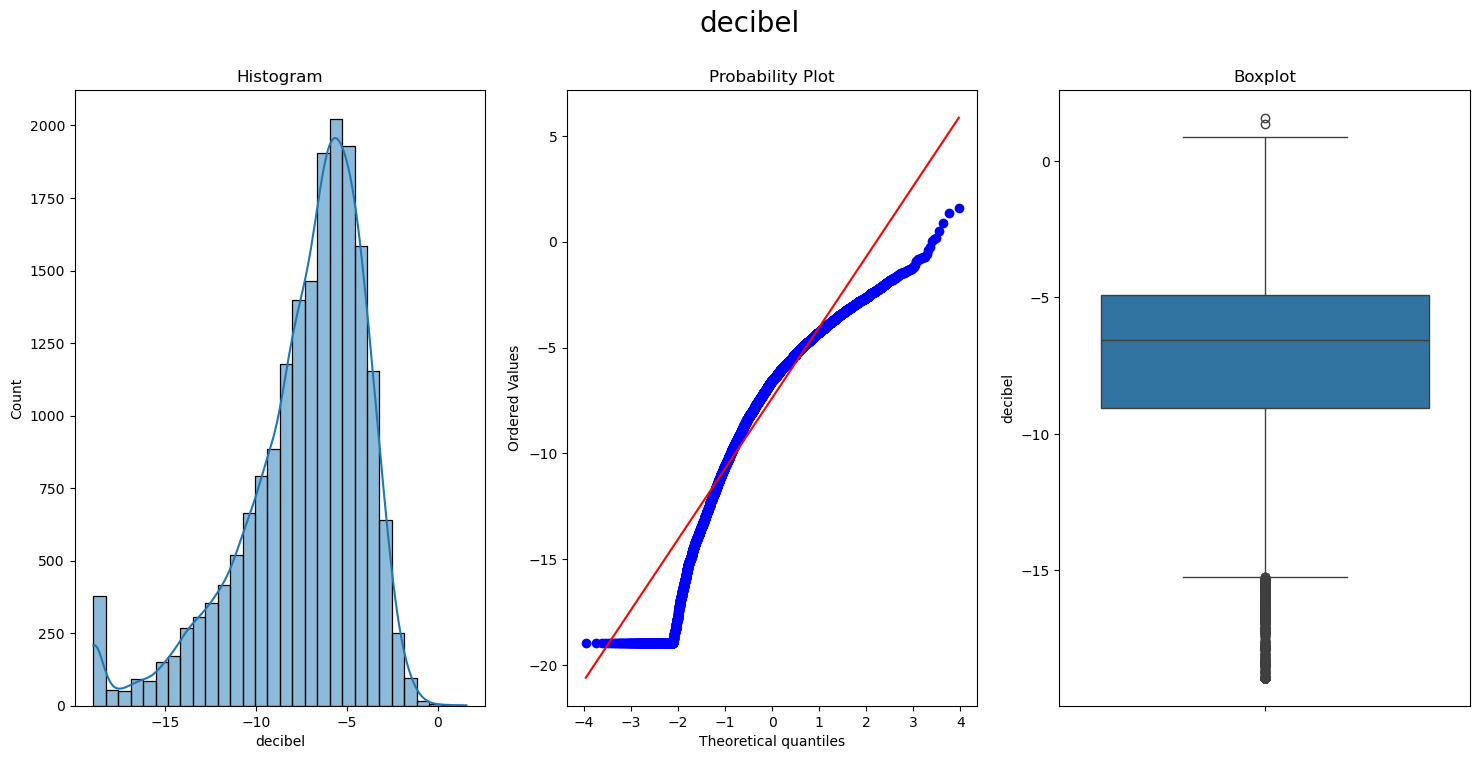

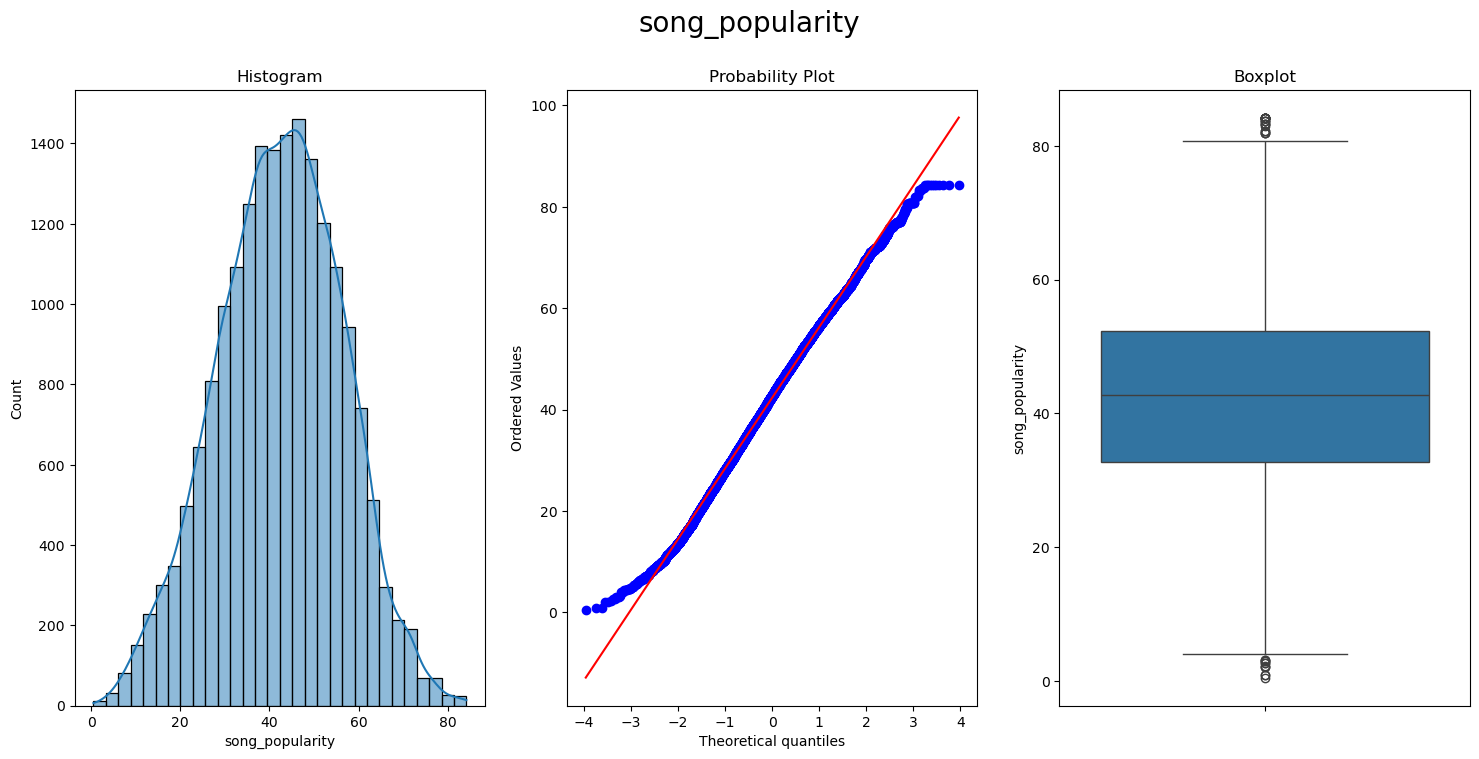

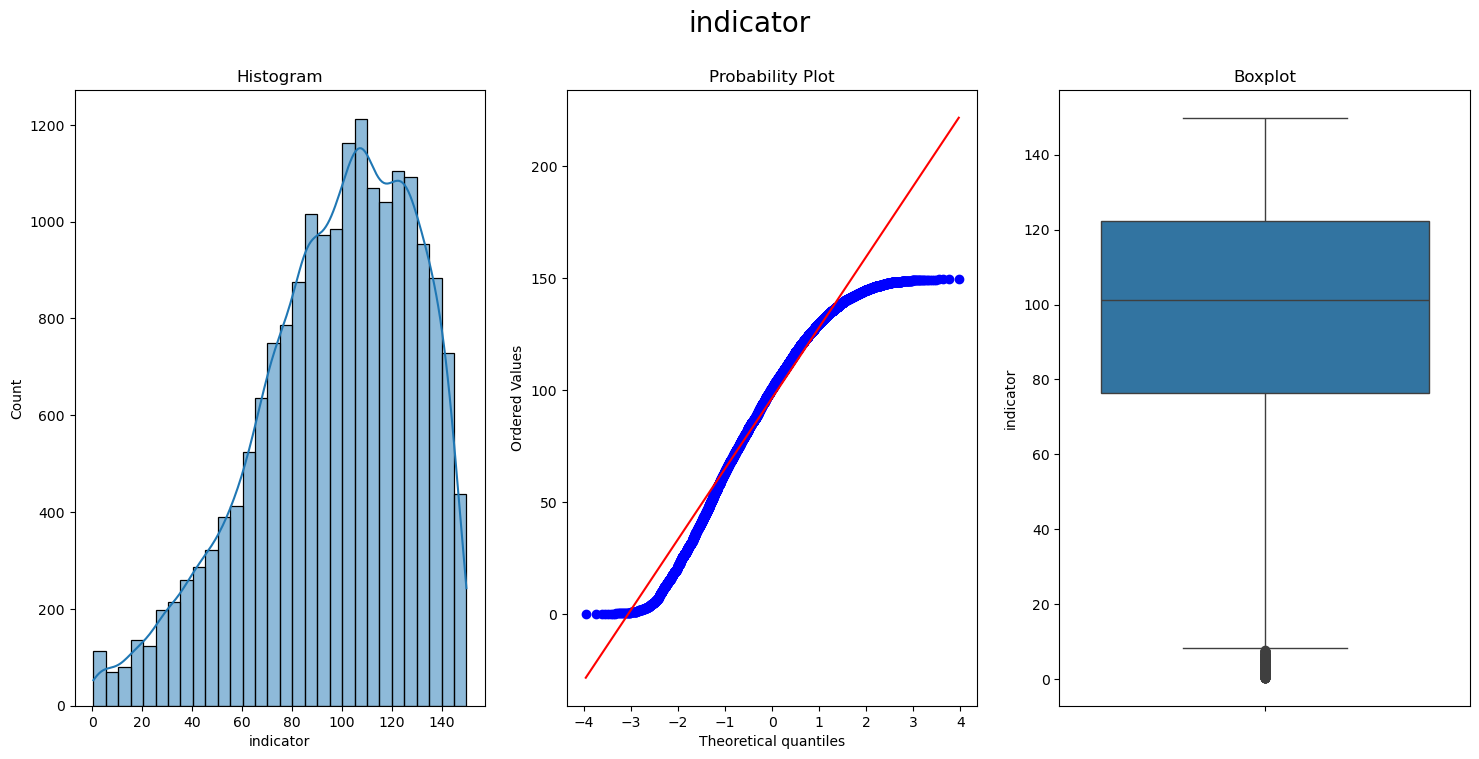

In [26]:
for column in song_data[num_cols]:
    diagnostic_plots(song_data, column)

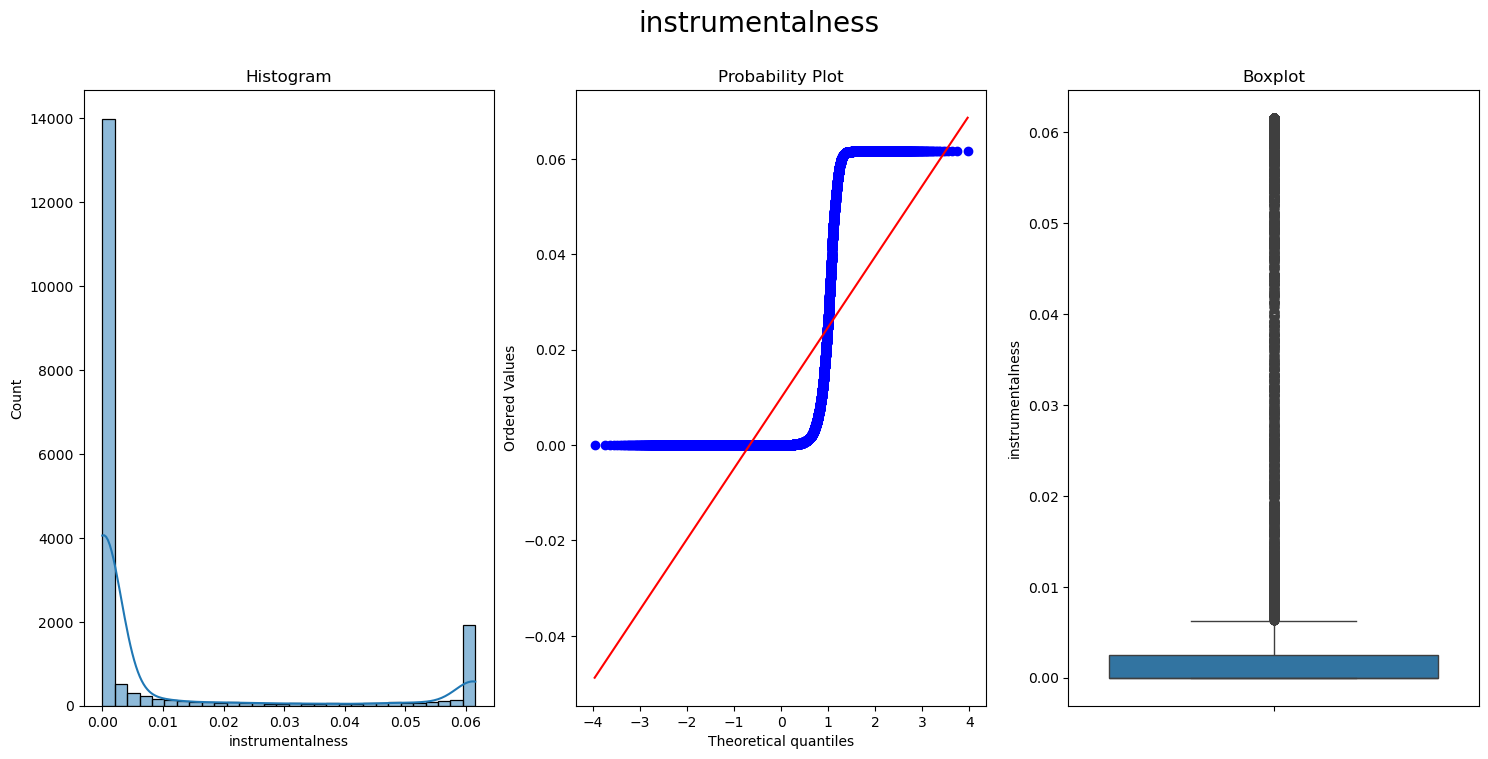

In [27]:

#Use Yeo-Johnson transformation to transform variables not following a normal distribution.
#Variables that have null values will be transformed after missing value imputation.

#import transformer
from feature_engine.transformation import YeoJohnsonTransformer
yjt = YeoJohnsonTransformer(variables = ['instrumentalness'])

yjt.fit(song_data)

song_data = yjt.transform(song_data)

for var in ['instrumentalness']:
    diagnostic_plots(song_data, var)

### Step 4: Train and Test Split

In [28]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    song_data.drop('song_popularity', axis=1), song_data['song_popularity'], test_size=0.3, random_state=0)

X_train.shape, X_test.shape

((13184, 15), (5651, 15))

### Step 5: Missing Value Imputation

In [29]:
#display missing values
cat_cols = [c for c in song_data.columns if song_data[c].dtypes == 'O']
X_train[cat_cols].isnull().mean()

dynamism    0.195009
loudness    0.100880
dtype: float64

In [30]:
# as we already imputed numerical variables in step 3, we will focus on imputing categorical variables.
#we will use frequent category imputation
import feature_engine.imputation as mdi

freq_imputer = mdi.CategoricalImputer(variables=['dynamism', 'loudness'], imputation_method = 'frequent')

freq_imputer.fit(X_train)

CategoricalImputer(imputation_method='frequent',
                   variables=['dynamism', 'loudness'])

In [31]:
X_train = freq_imputer.transform(X_train)
X_test = freq_imputer.transform(X_test)

### Step 6: Categorical Data Encoding

In [32]:
song_data[cat_cols].head()

,dynamism,loudness
0,High,Blare
1,High,Roar
2,Medium,Roar
3,Extra,Blare
4,High,Blare


In [33]:
from feature_engine.encoding import OrdinalEncoder

ordinal_enc = OrdinalEncoder(
    encoding_method='ordered',
    variables=cat_cols)

ordinal_enc.fit(X_train, y_train)

OrdinalEncoder(variables=['dynamism', 'loudness'])

In [34]:
X_train = ordinal_enc.transform(X_train)
X_test = ordinal_enc.transform(X_test)

C:\Users\tejsk\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) loudness.
  warnings.warn(


In [35]:
X_test = X_test.replace({np.nan : 17})

### Step 7: Variable Discretization /Binning

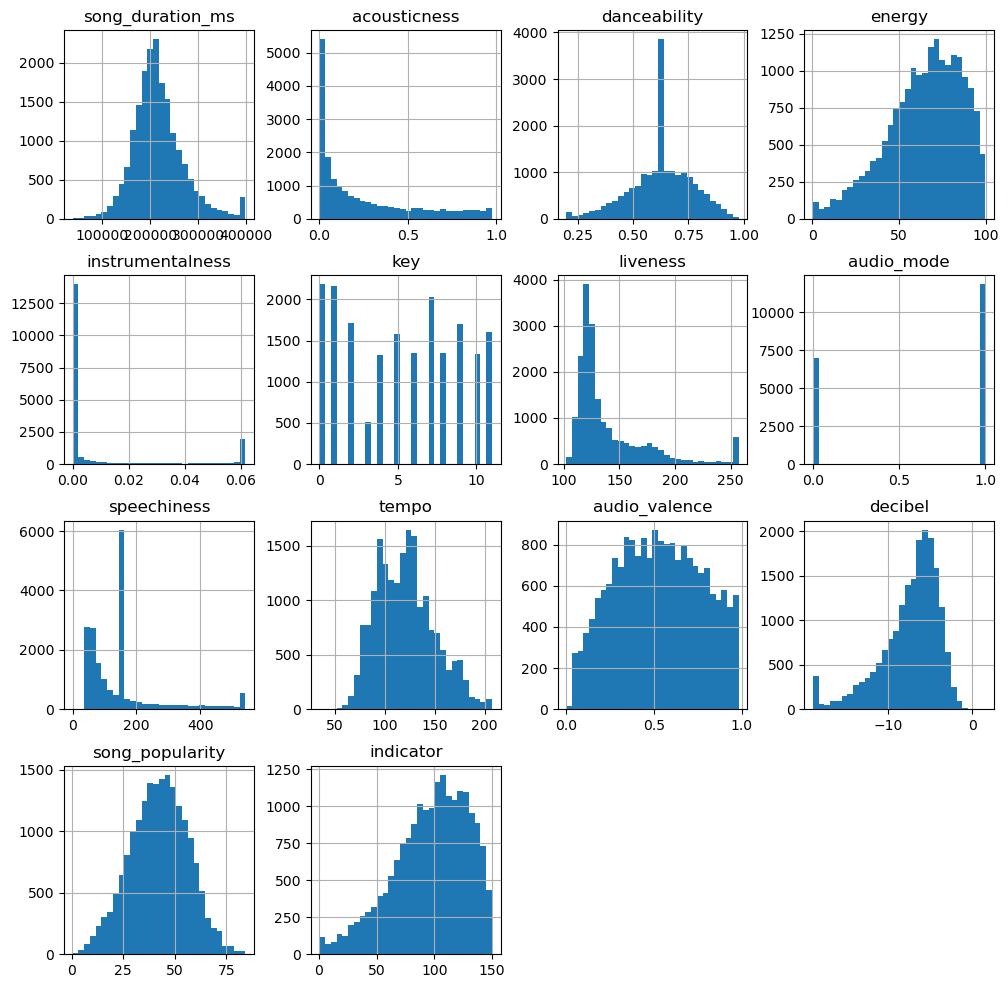

In [36]:
song_data[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

In [37]:
X_test.isnull().mean()

song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
audio_valence       0.0
dynamism            0.0
decibel             0.0
loudness            0.0
indicator           0.0
dtype: float64

In [38]:
#perform binning on energy and tempo
from feature_engine.discretisation import EqualFrequencyDiscretiser

song_disc = EqualFrequencyDiscretiser(q=10, variables = ['energy', 'tempo'], return_object=True)

song_disc.fit(X_train)

EqualFrequencyDiscretiser(return_object=True, variables=['energy', 'tempo'])

In [39]:
X_train = song_disc.transform(X_train)
X_test = song_disc.transform(X_test)

Text(0, 0.5, 'mean of price')

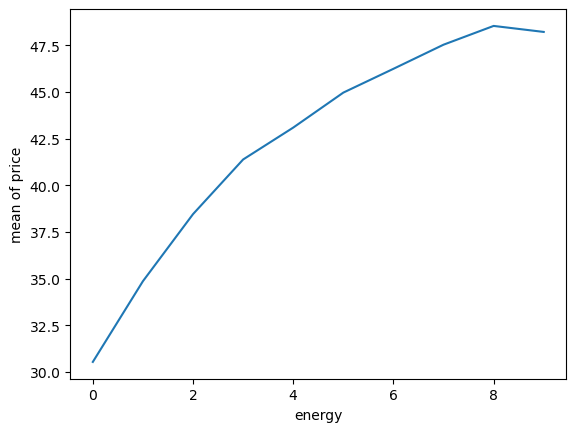

In [40]:
pd.concat([X_train, y_train], axis=1).groupby('energy')['song_popularity'].mean().plot()
plt.ylabel('mean of price')

In [41]:
energy_enc = OrdinalEncoder(encoding_method = 'ordered')

energy_enc.fit(X_train, y_train)

OrdinalEncoder()

In [42]:
X_train = energy_enc.transform(X_train)
X_test = energy_enc.transform(X_test)

Text(0, 0.5, 'mean of price')

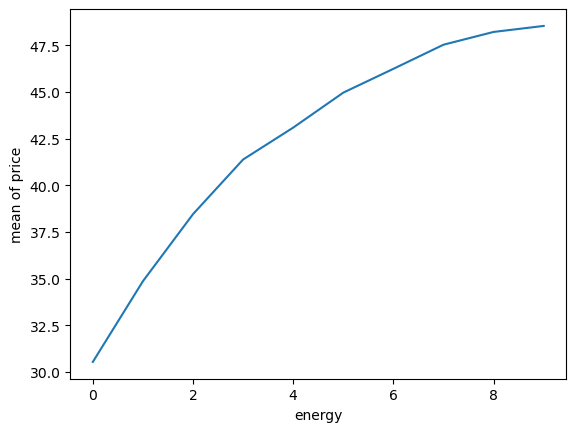

In [43]:
pd.concat([X_train, y_train], axis=1).groupby('energy')['song_popularity'].mean().plot()
plt.ylabel('mean of price')

### Step 8: Feature Engineer

In [44]:
from sklearn.preprocessing import StandardScaler, RobustScaler
scaler = StandardScaler()

scaler.fit(X_train)

StandardScaler()

In [45]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train_scaled = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X_test.columns)

In [47]:
X_train = pd.DataFrame(X_train_scaled, columns=X_train.columns)
X_test = pd.DataFrame(X_test_scaled, columns=X_test.columns)

### Step 9: Linear Regression Modelling

Linear regression is defined as a machine learning model in which the model finds the best fit linear line between the independent and dependent variables in which the aim is to find the best fit linear line and the optimal values of intercept and coefficients such that errors are minimized. For the purpose of this analysis, the goal is to use the X variables e.g. columns other than item outlet sales,to predict the item outlet sales (y variable, or target variable).
### Building and Evaluating the Model
In order to evaluate the model performance of a linear regression model, a range of measures can be used, but in this ASG1 we will focus on only 2:

- Mean Square Error (MSE): The MSE is the variance of the residuals, that is, the squared differences between prediction and actual observation. Lower values of MSE indicate better fit and model performance.
- R-Square: R-square represents the percentage of the response variable variation that is explained by a linear model. The closer to 1.0 the value of R-square, the more indicative of a better fit and model performance.

In [48]:
# assign your fully cleaned and transformed data contained within your versions of 
# X_train_student_final_premodel_version, X_test_student_final_premodel_version,
# y_train_student_final_premodel_version and y_test_student_final_premodel_version into
# the prepared variables below, for a simple linear regression model

In [49]:
X_train_final = X_train
X_test_final = X_test

y_train_final = y_train
y_test_final = y_test

In [50]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train_final, y_train_final)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_mse:', mean_squared_error(y_test_final, model_linear_regression.predict(X_test_final)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train_final, model_linear_regression.predict(X_train_final)), 
      '\n test_r-sq:', r2_score(y_test_final, model_linear_regression.predict(X_test_final)))

train_mse: 122.81304946755226 
 test_mse: 123.73360743303381
train_r-sq: 0.3670243612638623 
 test_r-sq: 0.3660013213445761


# Report 

### Part 1: Introduction


The music industry has changed a lot in the past years. With this immense amount of change in the industry, music labels are continuing to attempt to search for the next star that they can acquire under their wing. However, with the intricacies of music being so broad and subjective, no one could possibly hope to predict what the next big hit will be. That is what has been the consensus of the industry for longest time. However, over the past few years, there have been many popular songs that have reached a worldwide audience. Using the data gathered from popular songs over the past years, a dataset has been created with the various attributes of the song and used those attributes to calculate its popularity. The attributes in the dataset encompass a large amount of metrics, such as energy, danceability, acousticness, and speechiness. By analysing these variables, we can figure out how important these attributes are to creating a popular song.

Thus, using the dataset from above, I have been tasked by the higher ups at XYZ Records Company to analyse the influence of various characteristics of a song and how it affects the popularity of said song. To do that, My team and I have decided to use the song dataset from above to create a linear regression model capable of predicting a songs popularity based on its various attributes. However, to do that, I must first clean the data in the dataset and perform different types of transformations on the data. In this report, I will attempt to show you the processes that I have gone through to perform data wrangling on this dataset as well as well reflect on the performance of the model.

### Part 2: Exploratory Data Analysis

In this section, I will explore the initial 'song_popularity.csv' dataset by performing some analysis on the datasets and explaining the insights I have developed from the analysis and will add my conclusions from the data at the end.

#### 2.1 Dataset breakdown

In [52]:
song_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18835 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          18835 non-null  object 
 16  Song_Popularity   18835 non-null  float6

Now, I will perform analysis on the dataset. The dataset has 18 columns, with 18835 entries or rows of data. Of the 18 variables, 13 of them are numerical variables, which means that they only contain numbers in their data entries. The rest are categorical variables, which means they are non-numerical.

#### 2.2 Insights

Text(0.5, 0, 'Variables')

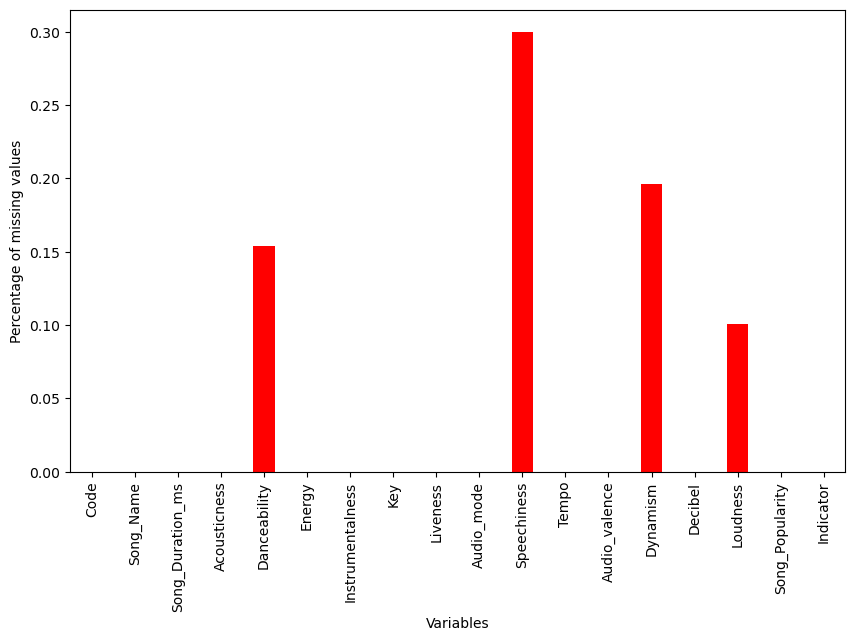

In [53]:
song_data_2 = song_data_2.replace({"?" : np.nan})
song_data_2.isnull().mean().plot.bar(figsize=(10,6), color = 'r')
plt.ylabel('Percentage of missing values')
plt.xlabel('Variables')

Firstly, let us talk about finding missing values. We have to locate missing values in the dataset as missing values will prevent the linear regression model from working completely. The code above shows the percentage of missing values in the dataset. For easy analysis, I have created a bar chart that shows the number of missing values in each column of the dataset. As seen in the diagram, there are 4 columns with missing variables, Danceability (15.38% missing), Speechiness (30% missing), Loudness (10.08% missing) and Dynamism (19.63% missing). These missing variables will be handled in various ways later on.

Text(0.5, 1.0, 'Cardinality')

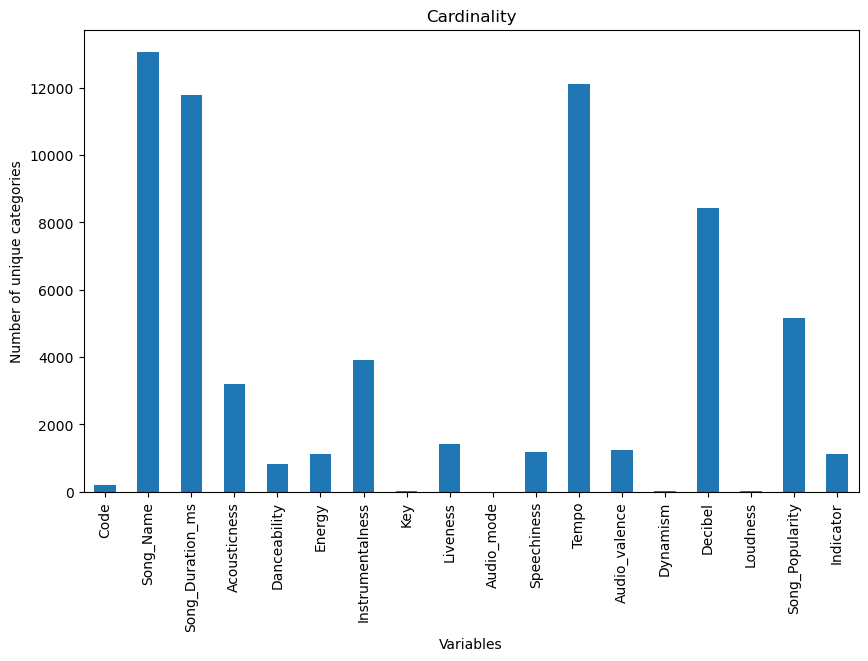

In [54]:
import matplotlib.pyplot as plt
song_data_2.nunique().plot.bar(figsize=(10,6))

plt.ylabel('Number of unique categories')
plt.xlabel('Variables')
plt.title('Cardinality')

Next, let us explore the cardinality of the variables in the dataset. The cardinality of the variables is defined as the the number of value that any given value in the column can take. Exploring the cardinality of variables is very important as it can point out a number of things, such as possible anomalies in the dataset, or tell me what types of encoding methods we should use. As we can see in the above chart of the cardinality of variables, variables such as Key, Dynamism and Loudness have low cardinality, while variables such as Tempo, Song_Duration_ms and Song_Name have high cardinality. 

After examining cardinality, we can begin examining rare categories in a variable in the dataset. The rare categories in the variable are important to find as leaving rare categories unchecked could lead to overfitting, where the model learns irrelevant patterns rather than the important underlying patterns. This results in poor generalization to new data. In the next example, we will be finding rare categories in the "Dynamism" variable, and dealing with the rare categories accordingly.

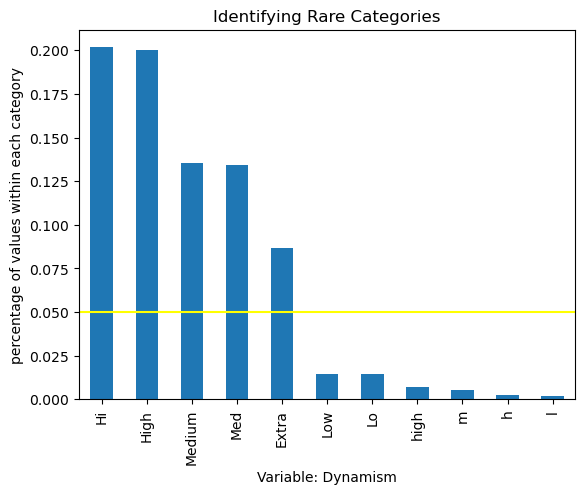

In [55]:
fig = (song_data_2['Dynamism'].value_counts() / len(song_data) ).sort_values(ascending=False).plot.bar()

fig.axhline(y=0.05, color='yellow')

fig.set_ylabel('percentage of values within each category')
fig.set_xlabel('Variable: Dynamism')
fig.set_title('Identifying Rare Categories')
plt.show()

As seen above, there are many repeated and different variables for the same thing (e.g high and hi), we will remap the variables.

In [56]:
dynamism_dictionary = {'Dynamism' : {'Hi' : 'High', 'Med' : 'Medium', 'high' : 'High', 'Lo' : 'Low', 'h' : 'High', 'm' : 'Medium', 'Lo' : 'Low', 'l' : 'Low'}}
song_data_2 = song_data_2.replace(dynamism_dictionary)

Let us check the data again.

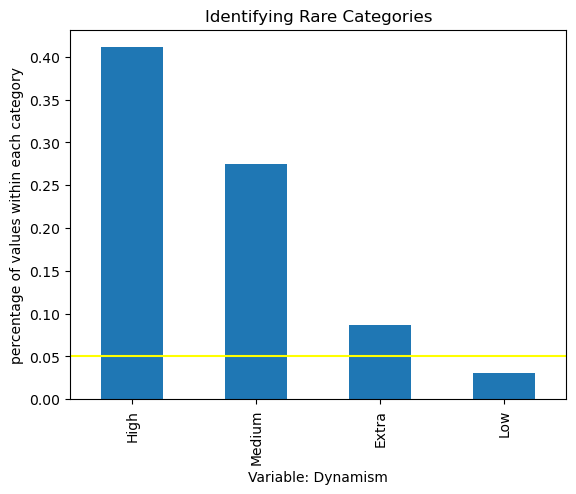

In [57]:
fig = (song_data_2['Dynamism'].value_counts() / len(song_data) ).sort_values(ascending=False).plot.bar()

fig.axhline(y=0.05, color='yellow')

fig.set_ylabel('percentage of values within each category')
fig.set_xlabel('Variable: Dynamism')
fig.set_title('Identifying Rare Categories')
plt.show()

We want to check the relationships between numerical values as easily as possible. Therefore, we will use a heatmap to display the relationships.

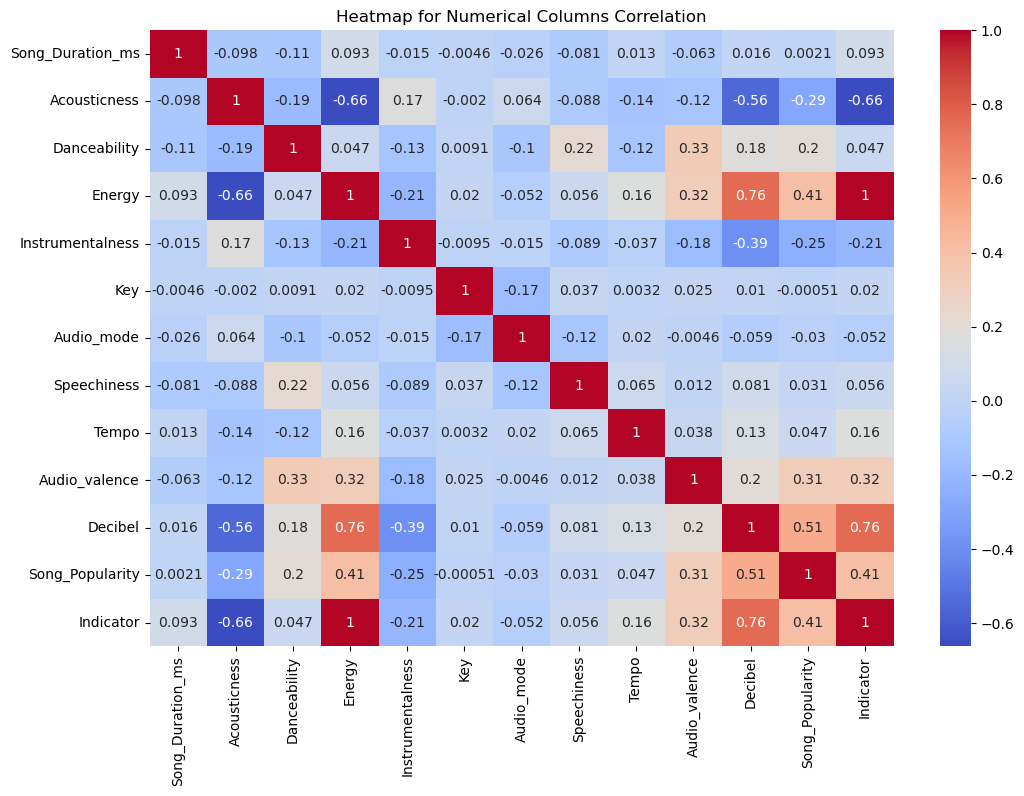

In [59]:
num_cols = [c for c in song_data_2.columns if song_data_2[c].dtypes !='O']
# Calculate correlation matrix
corr_matrix = song_data_2[num_cols].corr()

# Create heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Heatmap for Numerical Columns Correlation')
plt.show()

As seen the heatmap, there are stronmg positive relationships between indicator and decibel at a 0.76, and indicator and energy at a 1. On the oppositeend, we have decibel and acousticness (-0.66), and acousticness and indicator (-0.56).

### Part 3: Cleanse the Data

In this section, I will outline the steps taken by me to cleanse the data of two things: missing data and outliers. Before we begin, I will perform a train-test-split on the dataset to split the variables into training sets and testing sets. We will also perform general cleanup of the dataset. 

#### 3.1 General Dataset Cleaning and Train-Test Split

Firstly, let us take a general look at the first 5 rows of the dataset.

In [60]:
song_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18834 non-null  object 
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          16933 non-null  object 
 16  Song_Popularity   18835 non-null  float6

It seems like after '?' were replaced with null values, new columns have appeared with null values, Let us check the first 5 rows of the dataset to confirm that all our columns are using the correct datatypes.

In [61]:
song_data_2.head()

,Code,Song_Name,Song_Duration_ms,Acousticness,Danceability,Energy,Instrumentalness,Key,Liveness,Audio_mode,Speechiness,Tempo,Audio_valence,Dynamism,Decibel,Loudness,Song_Popularity,Indicator
0,HI8,Boulevard of Broken Dreams,262333,0.005410,0.49104,68.2,0.000029,8,112.126921,1,44.10,167.060,0.474,High,-4.095,Blare,57.72,102.30
1,HI10,In The End,216933,0.010094,0.53658,85.3,0.000000,3,122.7664,0,NaN,105.256,0.370,High,-6.407,Roar,45.37,127.95
2,MI11,Seven Nation Army,231733,0.008007,0.72963,46.3,0.447000,0,157.5025,1,118.80,123.881,0.324,Medium,-7.828,Roar,47.28,69.45
3,EI8,By The Way,216933,0.025872,0.44649,97.0,0.003550,0,121.4404,1,160.50,122.444,0.198,Extra,-4.938,Blare,52.89,145.50
4,HI9,How You Remind Me,223826,0.000935,0.44253,76.6,0.000000,10,123.8769,1,46.95,172.011,0.574,High,-5.065,Blare,46.68,114.90


It seems like the Liveness column is still displayed as an object column, despite it being a numerical column, now I will convert the column.

In [62]:
song_data_2 = song_data_2.astype({'Liveness' : 'float64'})

Let us take another look at the dataset. 

In [63]:
song_data_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18835 entries, 0 to 18834
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Code              18835 non-null  object 
 1   Song_Name         18835 non-null  object 
 2   Song_Duration_ms  18835 non-null  int64  
 3   Acousticness      18835 non-null  float64
 4   Danceability      15938 non-null  float64
 5   Energy            18835 non-null  float64
 6   Instrumentalness  18835 non-null  float64
 7   Key               18835 non-null  int64  
 8   Liveness          18834 non-null  float64
 9   Audio_mode        18835 non-null  int64  
 10  Speechiness       13184 non-null  float64
 11  Tempo             18835 non-null  float64
 12  Audio_valence     18835 non-null  float64
 13  Dynamism          15137 non-null  object 
 14  Decibel           18835 non-null  float64
 15  Loudness          16933 non-null  object 
 16  Song_Popularity   18835 non-null  float6

We have successfully converted the column to a numeric column. Now, let us drop the song_name and code columns as these do not serve any purpose in predicting the song's popularity.

In [64]:
song_data_2 = song_data_2.drop(columns=['Code', 'Song_Name'])

Finally, Let us convert all column names to lower case for easier referral.

In [65]:
song_data_names2 = []
for column in song_data_2:
    song_data_names2.append(column.lower())

song_data_2.columns = song_data_names2

Now, we will conduct the train-test split to split the dataset into training and testing sets.

In [66]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(
    song_data_2.drop('song_popularity', axis=1), song_data_2['song_popularity'], test_size=0.3, random_state=0)

X_train2.shape, X_test2.shape

((13184, 15), (5651, 15))

#### 3.2 Missing Data Imputation

In some of the variables, there are missing values. These missing values need to be replaced more often than not, as any amount of null values that still remain in the dataset will cause the model to stop working. In this section, I outline how I imputed hte missing values using majorly different techniques

#### Categorical Variables

Let us take a look at the categorical variables in the dataset.

In [67]:
cat_cols = [c for c in X_train2.columns if X_train2[c].dtypes =='O']

X_train2[cat_cols].info()

<class 'pandas.core.frame.DataFrame'>
Index: 13184 entries, 4659 to 2732
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   dynamism  10613 non-null  object
 1   loudness  11854 non-null  object
dtypes: object(2)
memory usage: 309.0+ KB


As seen in the above list, there are only 2 categorical variables in the dataset. Both these variables contain null values. We will have to conduct missing value imputation on these variables. As they are categorical variables, I have chosen to use a method of missing value imputing called "Frequent category imputation". This from of imputation is carried out by finding the category in the variable that is the most frequently seen in the variable, and using it to replace all the null variables. Lets use the dynamism column as an example. In the dynamism variable, the most frequent category is "High". Thus, the imputer will use the "High" category to replace all the null values. The next two cells will show the imputer in action.

In [68]:
#Set up the frequent category imputer
freq_imputer2 = mdi.CategoricalImputer(variables=cat_cols, imputation_method = 'frequent')

#Fit the imputer to the training dataset so it can learn the variables.
freq_imputer2.fit(X_train2)

CategoricalImputer(imputation_method='frequent',
                   variables=['dynamism', 'loudness'])

In [69]:
#Transform X_train2 and X_test2
X_train2 = freq_imputer2.transform(X_train2)
X_test2 = freq_imputer2.transform(X_test2)

Now we will check to see if there are any null values remaining in the training and testing sets for the categorical columns.

In [70]:
print("X_train2\n",X_train2[cat_cols].isnull().mean())
print('')
print("X_test2\n",X_test2[cat_cols].isnull().mean())

X_train2
 dynamism    0.0
loudness    0.0
dtype: float64

X_test2
 dynamism    0.0
loudness    0.0
dtype: float64


As there are no more null values, we can assume that the imputation has succeeded.

#### Numerical Variables

Let us take a look at the numerical variables in the dataset.

In [71]:
num_cols = [c for c in X_train2.columns if X_train2[c].dtypes !='O']

X_train2[num_cols].isnull().mean()

song_duration_ms    0.000000
acousticness        0.000000
danceability        0.154581
energy              0.000000
instrumentalness    0.000000
key                 0.000000
liveness            0.000076
audio_mode          0.000000
speechiness         0.298468
tempo               0.000000
audio_valence       0.000000
decibel             0.000000
indicator           0.000000
dtype: float64

As seen in the above list, there are only 3 numerical variables in the dataset with null values in them. We will have to conduct missing value imputation on these variables. Since they are numerical variables, we can use a method of missing value imputing called "mean value imputation". This from of imputation is carried out by taking the average of every value in the variable, and using it to replace all the null values in the column. The next two cells will show the imputer in at work.

In [72]:
#Set up the imputer
mean_imputer2 = MeanMedianImputer(imputation_method='mean',
                                   variables=['danceability', 'speechiness', 'liveness'])

#Fit the imputer to the training dataset so it can learn the variables.
mean_imputer2.fit(X_train2)

MeanMedianImputer(imputation_method='mean',
                  variables=['danceability', 'speechiness', 'liveness'])

In [73]:
X_train2 = mean_imputer2.transform(X_train2)
X_test2 = mean_imputer2.transform(X_test2)

In [74]:
print("X_train2\n",X_train2[num_cols].isnull().mean())
print('')
print("X_test2\n",X_test2[num_cols].isnull().mean())

X_train2
 song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
audio_valence       0.0
decibel             0.0
indicator           0.0
dtype: float64

X_test2
 song_duration_ms    0.0
acousticness        0.0
danceability        0.0
energy              0.0
instrumentalness    0.0
key                 0.0
liveness            0.0
audio_mode          0.0
speechiness         0.0
tempo               0.0
audio_valence       0.0
decibel             0.0
indicator           0.0
dtype: float64


As there are no more null values, we can assume that the imputation has succeeded.

#### 3.3 Outlier Trimming

Let us analyse the distributions of the numerical values in the dataset.

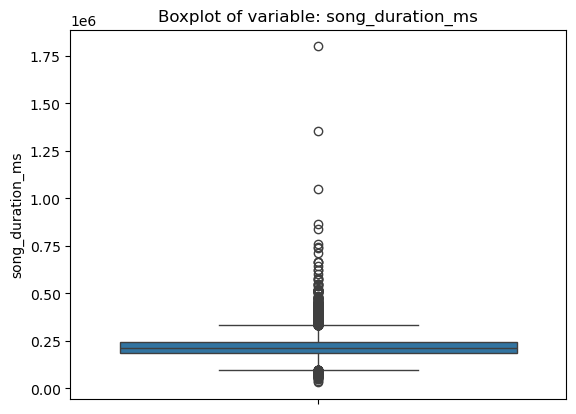

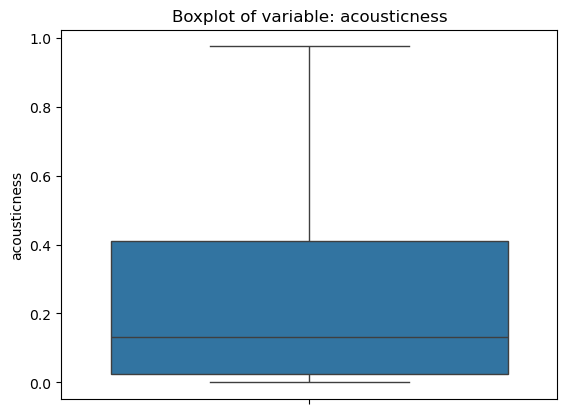

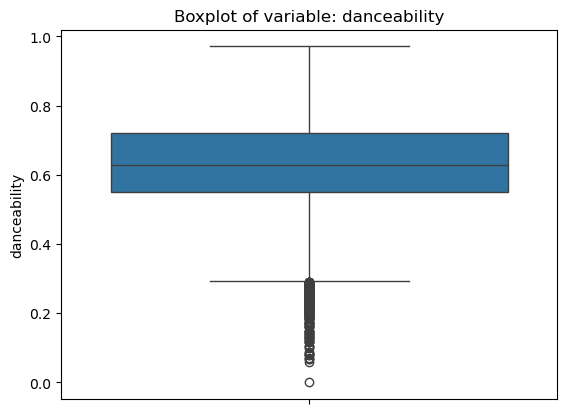

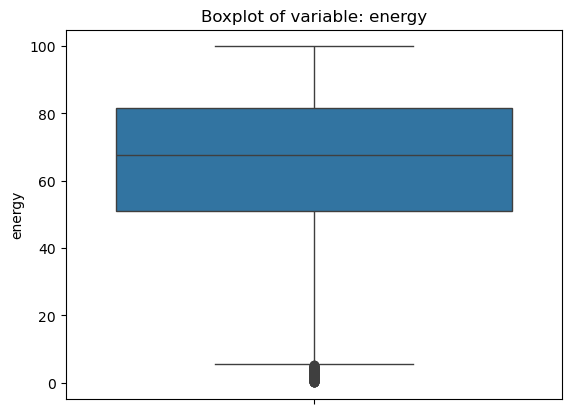

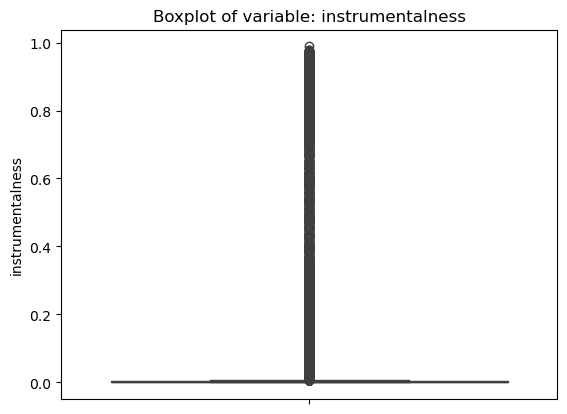

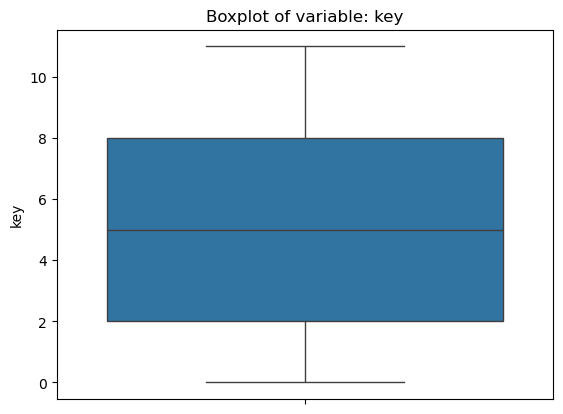

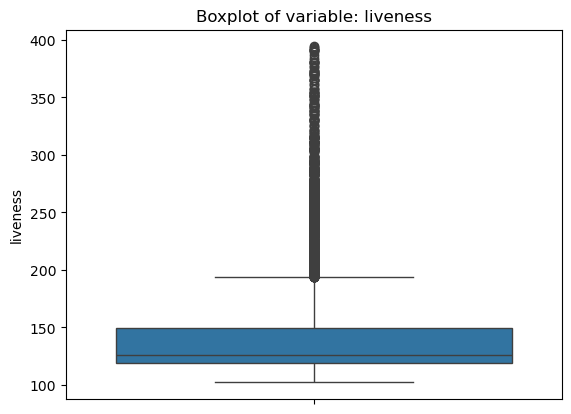

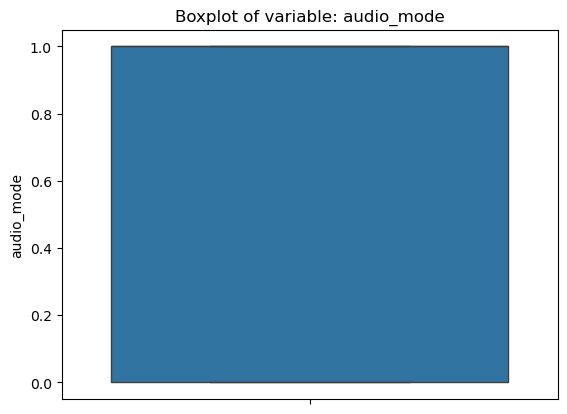

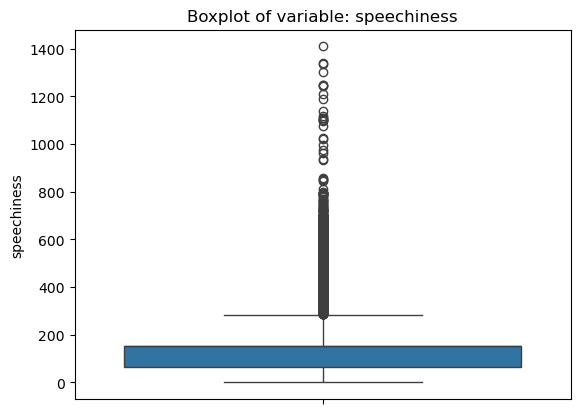

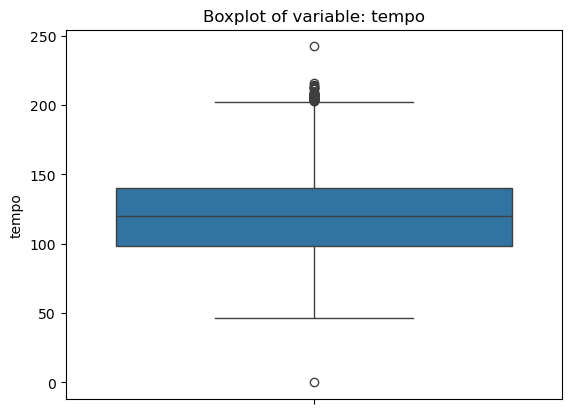

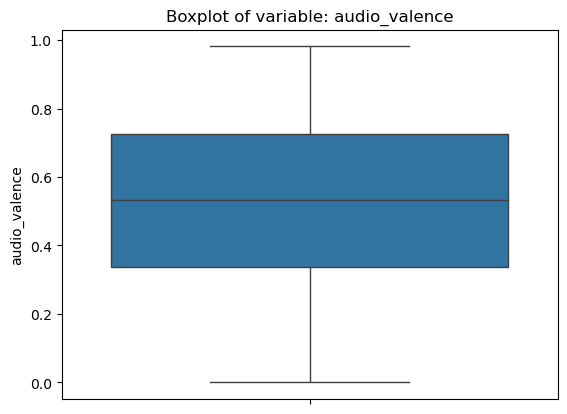

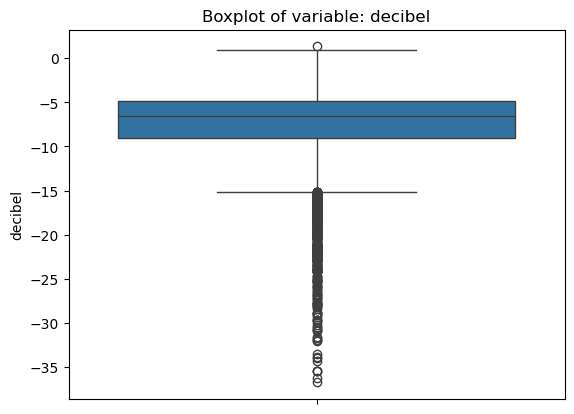

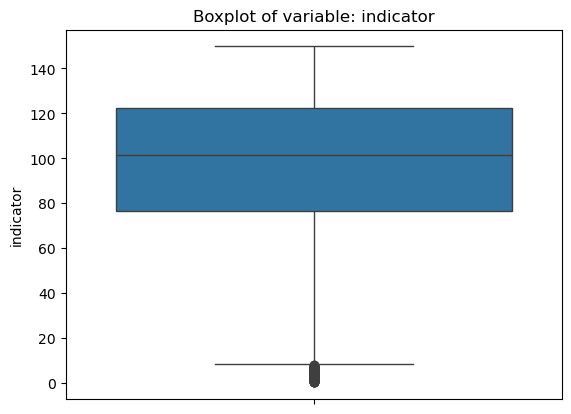

In [75]:
for column in X_train2[num_cols]:
    sns.boxplot(y = X_train2[column])
    plt.title('Boxplot of variable: ' + column)
    plt.show()

Most of the numerical variables in the dataset are extremely skewed and contain many outliers as seen in the above set of boxplots. Outliers need to be removed so the data will not be inherently skewed in any direction, which will affect the model's predictions. Therefore, we need to perform outlier trimming on all the numerical columns. To do this we will be performing a form of outlier handling known as capping. Capping works by replacing extreme values by the mean and standard deviation or the inter-quartile range proximity rule. We will be performing the latter today. 

In [76]:
#Set up the capper
windsorizer = Winsorizer(capping_method='gaussian', # choose iqr for skewed or gaussian for normal
                          tail='both', # cap left, right or both tails 
                          fold=3,
                          variables=list(X_train2[num_cols].columns))

#Fit the capper
windsorizer.fit(X_train2[num_cols])

#Transform the numerical variables using the capper
X_train2[num_cols] = windsorizer.transform(X_train2[num_cols])

Let us compare the changes.

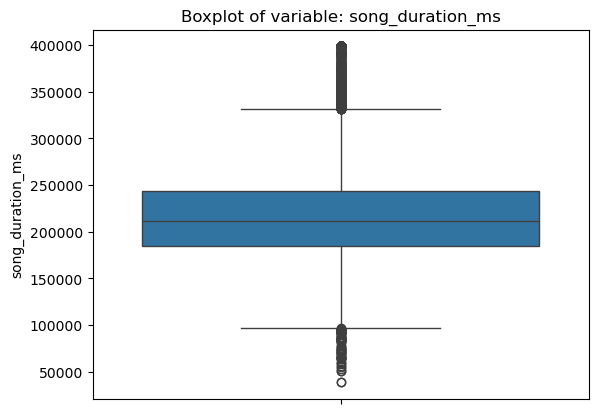

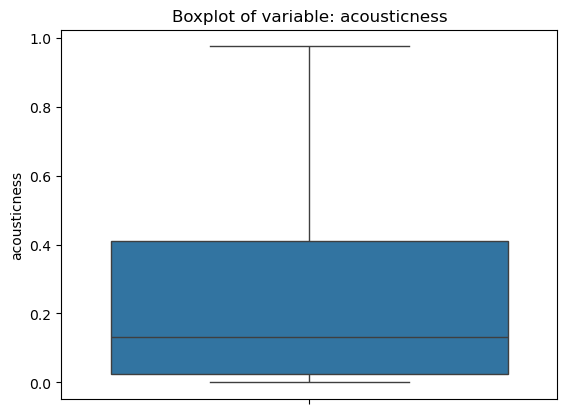

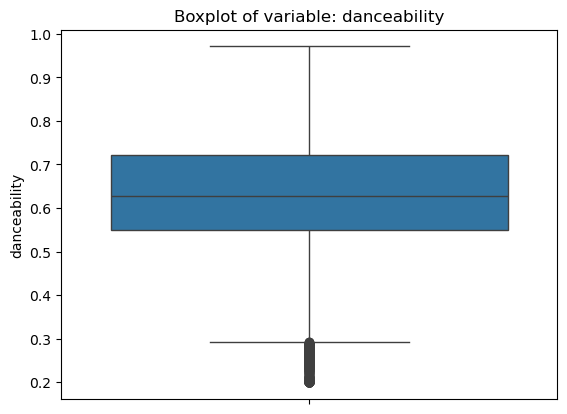

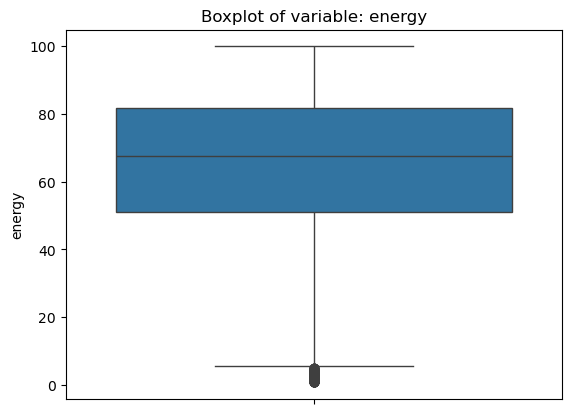

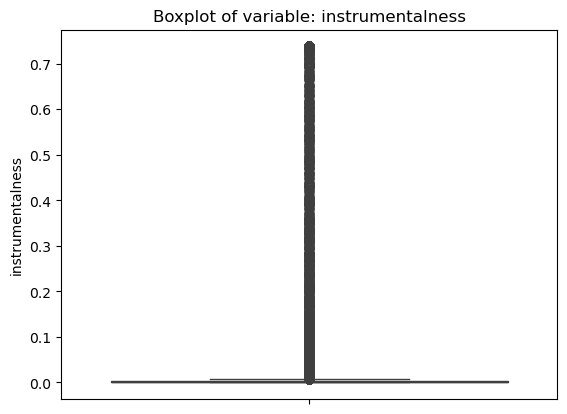

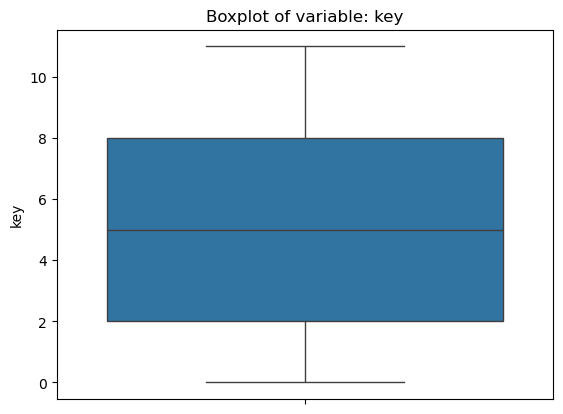

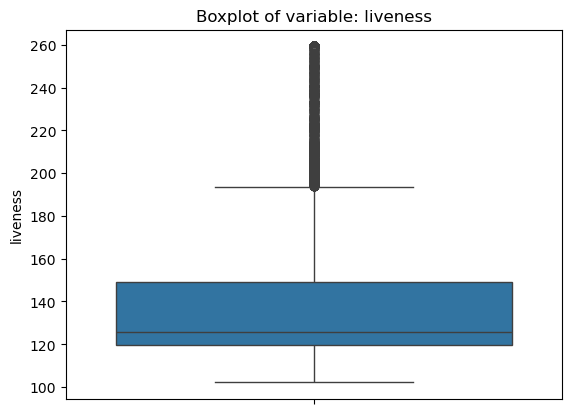

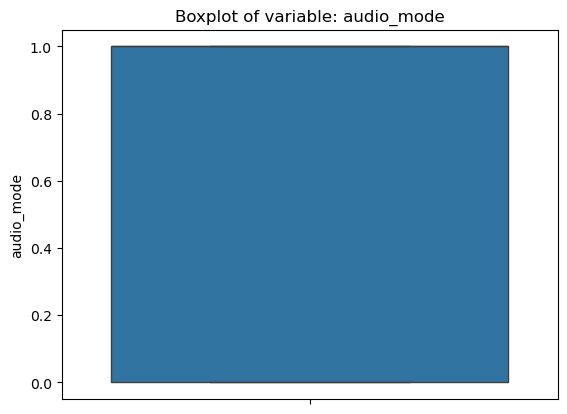

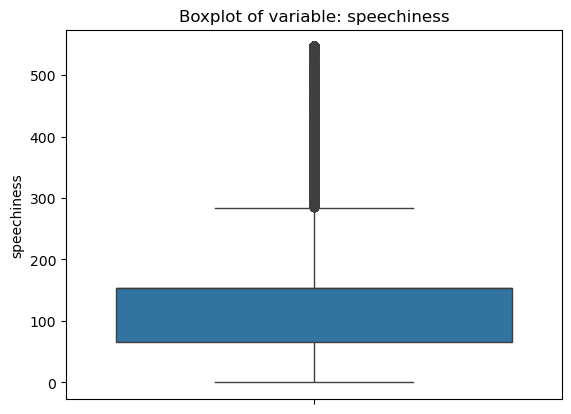

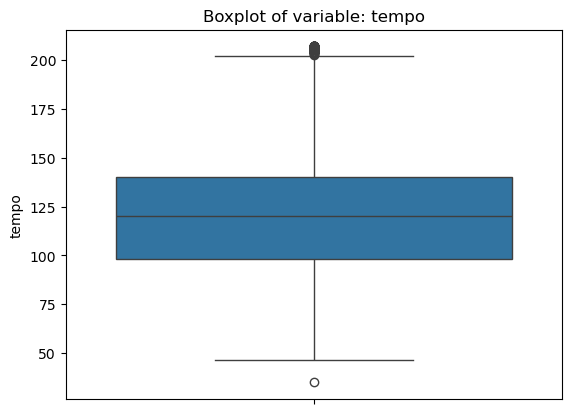

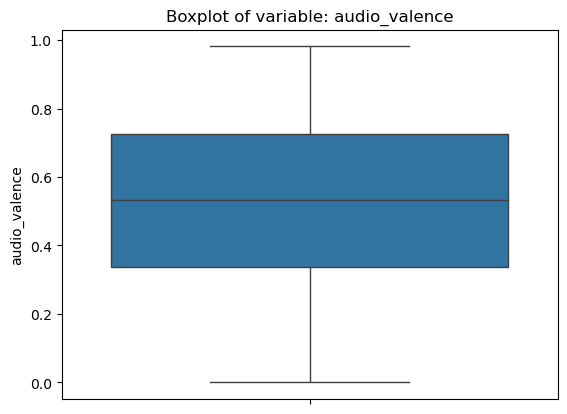

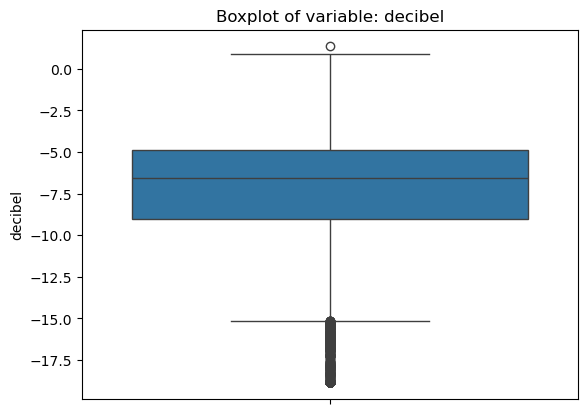

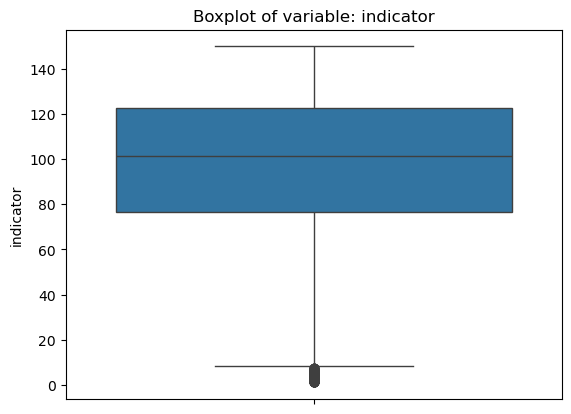

In [77]:
for column in X_train2[num_cols]:
    sns.boxplot(y = X_train2[column])
    plt.title('Boxplot of variable: ' + column)
    plt.show()

As seen in the before and after, the second set of boxplots evidently had more outliers removed. The the outlier removal was a success.

### Part 4: Data Transformation

In this section, I will go over data transformation techniques and how I applied them to both the numeric and categorical data.

#### 4.1 Categorical Data Encoding

The values of categorical variables are often encoded as strings. Scikit-learn, which is the python library will be using to create the linear regression model, does not support strings as values, therefore, we need to transform those strings into numbers. The act of replacing strings with numbers is called categorical data encoding. I will be performing categorical data encoding on the categorical values, 'dynamism' and 'loudness' in this section as they are the only categorical variables in the dataset. 

To perform categorical data encoding, I have chosen to use the ordinal data encoder as the cardinality of these two variables are high enough to prevent me from using one-hot encoding. Ordinal data encoding is a form of data encoding where the data is encoded using numbers from 0 to k, where k is the number of categories in the variable. The numbers are assigned using the by determining the categories performance against the the target variable, and then assigning numbers from the worst to the best. I chose this method as linear models have a hard time using the data from regular ordinal encoding where data is randomly assigned a number. In the following section, I will walk you through the processes I took to do this step.

Let us begin by checking the data in the categorical columns.

In [78]:
X_train2[cat_cols].head()

,dynamism,loudness
4659,High,Roar
4389,Medium,Blare
10549,Medium,Clang
11105,Low,Babble
3183,Medium,Roar


Next, we will set up the data encoder and fit it to train set and the target set.

In [79]:
ordinal_enc2 = OrdinalEncoder(
    encoding_method='ordered',
    variables=cat_cols)

ordinal_enc2.fit(X_train2, y_train2)

OrdinalEncoder(variables=['dynamism', 'loudness'])

Next, we transform the data using the ordinal encoder.

In [80]:
X_train2 = ordinal_enc2.transform(X_train2)
X_test2 = ordinal_enc2.transform(X_test2)

C:\Users\tejsk\anaconda3\Lib\site-packages\feature_engine\encoding\base_encoder.py:260: UserWarning: During the encoding, NaN values were introduced in the feature(s) loudness.
  warnings.warn(


As seen above, a null value was placed in the test set during the encoding. this is because the "loudness" category has a rare variable that appeared in the test set, but not the training set. To combat this, we will manually replace the value with the number it is supposed to have, 17.

In [81]:
X_test2 = X_test2.replace({np.nan : 17})

Now, let us check the 2 columns after encoding.


In [82]:
X_train2[cat_cols].head()

,dynamism,loudness
4659,2,11
4389,1,12
10549,1,10
11105,0,6
3183,1,11


As you can see, the encoding worked properly as the values were converted to integers.

#### 4.2 Variable Discretization/Binning

Discretization, or binning, is the process of transforming continuous variables into discrete variables by creating a set of contiguous intervals, also called bins, that span the range of the variable values. Discretization is used to change the distribution of skewed variables and to minimize the influence of outliers, and hence improve the performance of our linear regression model. Using discretization, outlier are placed into the higher of lower intervals, maing them unable to be differentiated from the rest of the data. This massively increases the models performance. Discretized data is also easier to interpret and analyze, as it transforms continuous variables into a finite number of categories, making it simpler to understand. 

We will be using equal-frequency discretization. Equal-frequency discretization divides the values of the variable into intervals that carry the same amount of observations. This is useful for skewed data, and it allows the user to sort the data into any number of groups. below, I will go through my thought processes and run thought the visuals.

Display the distributions of all the numerical variables.

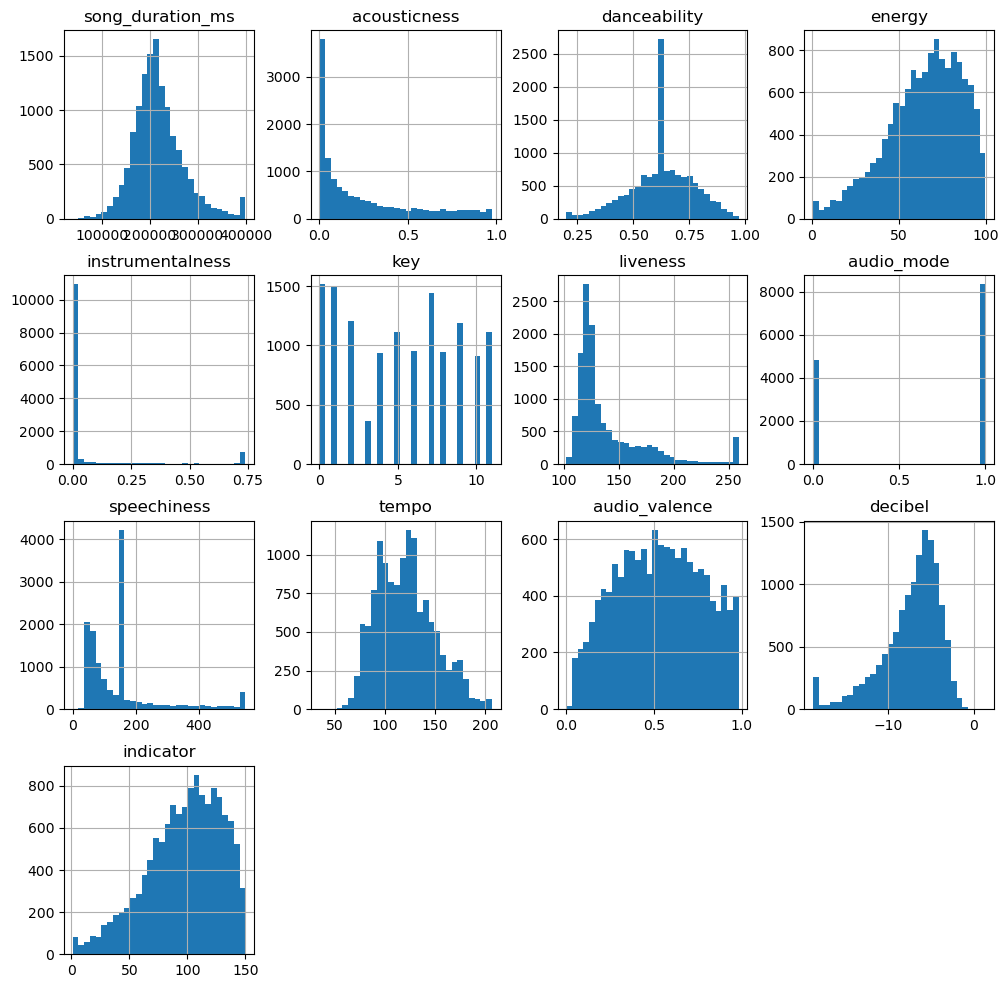

In [83]:
X_train2[num_cols].hist(bins=30, figsize=(12,12))
plt.show()

I chose energy and tempo to be discretized as they are continous variables that are skewed. Equal-frequency discretization performs better on skewed data, which is why I chose it to discretize these columns. We set up the discretizer, and fit it to the training dataset.

In [84]:
#perform binning on energy and tempo
song_disc2 = EqualFrequencyDiscretiser(q=10, variables = ['energy', 'tempo'], return_object=True)

song_disc2.fit(X_train2)

EqualFrequencyDiscretiser(return_object=True, variables=['energy', 'tempo'])

We then transform the data using the discretiser.

In [85]:
X_train2 = song_disc2.transform(X_train2)
X_test2 = song_disc2.transform(X_test2)

In [86]:
X_train2[['energy', 'tempo']].head()

,energy,tempo
4659,5,3
4389,3,2
10549,2,7
11105,0,0
3183,3,7


The discretizer has sorted the variables into bins, as seen above.

### Part 5: Feature Engineering

#### 5.1 Feature Scaling

Feature scaling is the act of converting large value ranges of different features to a common scale. This is to ensure that each feature contributes equally to the analysis, thereby improving the performance and convergence speed of various algorithms. In machine learning models, features with larger ranges can disproportionately influence the model's predictions. By scaling features to a common range, we can prevent this imbalance. Therefore, we will scale all the variables in this dataset to the same range for greater model performance. To do this, I will be using standardisation. Standardisation is the process of centering the variable at zero and standardising the variance to 1. To standardize features, we subtract the mean from each observation and then divide the result by the standard deviation.

Set up the Scaler and fit the scaler with the training dataset

In [87]:
X_train2o = X_train2
X_test2o = X_test2

In [88]:
scaler2 = StandardScaler()

scaler2.fit(X_train2)

StandardScaler()

Transform the datasets. This will return a numPy array, so we will convert it back to a pandas dataframe in the next cell for accessibility.

In [89]:
X_train_scaled2 = scaler2.transform(X_train2)
X_test_scaled2 = scaler2.transform(X_test2)

In [90]:
X_train2 = pd.DataFrame(X_train_scaled2, columns=X_train.columns)
X_test2 = pd.DataFrame(X_test_scaled2, columns=X_test.columns)

Now we will compare the variable distributions before and after scaling.

In [91]:
X_train2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13184 entries, 0 to 13183
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   song_duration_ms  13184 non-null  float64
 1   acousticness      13184 non-null  float64
 2   danceability      13184 non-null  float64
 3   energy            13184 non-null  float64
 4   instrumentalness  13184 non-null  float64
 5   key               13184 non-null  float64
 6   liveness          13184 non-null  float64
 7   audio_mode        13184 non-null  float64
 8   speechiness       13184 non-null  float64
 9   tempo             13184 non-null  float64
 10  audio_valence     13184 non-null  float64
 11  dynamism          13184 non-null  float64
 12  decibel           13184 non-null  float64
 13  loudness          13184 non-null  float64
 14  indicator         13184 non-null  float64
dtypes: float64(15)
memory usage: 1.5 MB


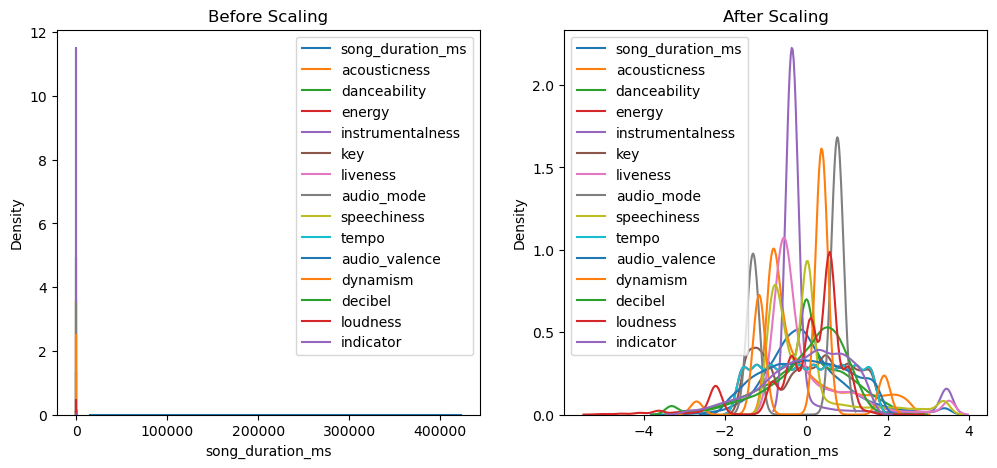

In [92]:

fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

# before scaling
ax1.set_title('Before Scaling')
for column in X_train2o:
    sns.kdeplot(X_train2o[column], ax=ax1, label = column)
ax1.legend()

# after scaling
ax2.set_title('After Scaling')
for column in X_train2:
    sns.kdeplot(X_train2[column], ax=ax2, label = column)
ax2.legend()
plt.show()

Note how all the distributions are now centred around 0.

### Part 6: Linear Regression Model

Now, we will build the linear regression model. Linear regression is a machine learning model designed to identify the best-fit linear line between independent and dependent variables. The objective is to determine the optimal values for the intercept and coefficients, ensuring that errors are minimized. In this analysis, the goal is to use the X variables (i.e., columns other than item outlet sales) to predict the item outlet sales, which serves as the y variable or target variable. In this case, we are using the X variables (song attributes) to predict the popularity of the songs. We will be using 2 metrics to grade our model. Mean Square Error (MSE) and R-Square. The lower MSE, the better the model performance and the closer the r-square value to 1, the better the model performance.

In [93]:
# Build Linear Regression Model
model_linear_regression = LinearRegression()
model_linear_regression.fit(X_train2, y_train2)

# Evaluate the Linear Regression Model using Mean Square Error (MSE)
# The lower MSE, the better the model performance
print('train_mse:', mean_squared_error(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_mse:', mean_squared_error(y_test2, model_linear_regression.predict(X_test2)))

# Evaluate the Linear Regression Model using R-Square
# The closer the r-square value to 1, the better the model performance
print('train_r-sq:', r2_score(y_train2, model_linear_regression.predict(X_train2)), 
      '\n test_r-sq:', r2_score(y_test2, model_linear_regression.predict(X_test2)))

train_mse: 123.06090967103192 
 test_mse: 133.38130093551945
train_r-sq: 0.3663724249099102 
 test_r-sq: 0.3175613111566533


As seen in the results above, the linear regression model shows a moderate fit to the training data, as indicated by the R-squared value of 0.3664 and a train MSE of 123.0609. When applied to the test data, the model's performance slightly decreases, with an R-squared value of 0.3176 and a test MSE of 133.3813. This means that while the model captures some of the relationships between the song attributes and song popularity, there is still a substantial amount of variance unexplained. The increase in MSE and decrease in R-squared on the test data indicates that the model retains most of its predictive power on unseen data.

### Part 7: Summary and Further Improvements

In summary, I have performed many changed to the dataset in this report, such as removing missing data from categorical variables and numerical variables using frequent category imputation and mean value imputation respectively, used capping to remove outliers from the dataset, used ordered ordinal encoding to encode categorical data, discretised numerical data and conducted feature scaling on the data. The linear regression model is relatively accurate when switching to test data. However, there are a few things I could improve to create a better model.

Firstly, I could remove more rare categories so that they do not cause problems. An example would be the value not in the testing set being marked as a null value because it was not in the training set. Secondly, I could experiment with the columns that were chosen for discretisation. Certain columns being changed result in a better model performance. Lastly, I could add features, which are the product ofadding or subtracting 2 or more rows. All of these techniques could have been used to make a better model in my opinion. In conclusion, the model that was created should be sufficient to analyse future songs.